In [1]:
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp

np.seterr(all="ignore")

from threeML import *
from threeML.io.package_data import get_path_of_data_file
from threeML.io import update_logging_level
from threeML.utils.data_download.Fermi_LAT.download_LAT_data import LAT_dataset
from astropy.io import fits as pyfits

SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


# This if you want to toggle different type of logging level.
update_logging_level("INFO")
log.error("error")
log.info("info")
log.debug("debug")

06:55:42 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=734266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=538301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=689650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=11821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

06:55:43 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=359328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=84599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

06:55:45 ERROR     error                                                                           ]8;id=27090;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_33811/3699701126.py\3699701126.py]8;;\:]8;id=680816;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_33811/3699701126.py#29\29]8;;\

         INFO      info                                                                            ]8;id=576085;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_33811/3699701126.py\3699701126.py]8;;\:]8;id=652128;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_33811/3699701126.py#30\30]8;;\

## GtBurst
Gtburst contains all the classes and methods to perform Fermi LAT data. It internally uses the official fermitools software. Here an example to list the IRFS available:


In [2]:
from GtBurst import IRFS

irfs = IRFS.IRFS.keys()
print(irfs)

odict_keys(['p7rep_transient', 'p7rep_source', 'p7rep_clean', 'p7rep_ultraclean', 'p8r2_transient100e', 'p8r2_transient100', 'p8r2_transient020e', 'p8r2_transient020', 'p8r2_transient010e', 'p8r2_transient010', 'p8r2_source', 'p8r2_clean', 'p8r2_ultraclean', 'p8r2_ultracleanveto', 'p8r2_transient100s', 'p8r2_transient015s', 'p8_transient100e', 'p8_transient100', 'p8_transient020e', 'p8_transient020', 'p8_transient010e', 'p8_transient010', 'p8_source', 'p8_clean', 'p8_ultraclean', 'p8_ultracleanveto', 'p8_sourceveto', 'p8_transient100s', 'p8_transient015s'])


## The LAT Transient Builder
Let's see how to make a plug in for the unbinned analysis of Fermi LAT data. First we use the information form a triggered GRB to obtain MET, RA and DEC, that are needed for the analysis.


In [3]:
from GtBurst.TriggerSelector import TriggerSelector

myFavoriteGRB = "bn190114873"


def findGRB(grb_name):
    a = TriggerSelector()
    a.downloadList()
    myGRB = {}
    for x in a.data:
        if x[0] == myFavoriteGRB:
            myGRB["MET"] = float(x[1])
            myGRB["RA"] = float(x[3])
            myGRB["DEC"] = float(x[4])
            myGRB["ERR"] = float(x[5])
            return myGRB
            pass
    return None

In [4]:
myGRB = findGRB(myFavoriteGRB)
print(myGRB)

{'MET': 569192227.626, 'RA': 54.51, 'DEC': -26.939, 'ERR': 0.05}


Then, we download LAT data and we build the transient builder, we want to analyze 1000 seconds since the trigger. Let's start download the data:


In [5]:
tstart = 0
tstop = 1000

In [6]:
myLATdataset = LAT_dataset()

myLATdataset.make_LAT_dataset(
    ra=myGRB["RA"],
    dec=myGRB["DEC"],
    radius=12,
    trigger_time=myGRB["MET"],
    tstart=tstart,
    tstop=tstop,
    data_type="Extended",
    destination_directory=".",
    Emin=100.0,
    Emax=10000.0,
)  # Energies are MeV (this is from 100 MeV to 10 GeV)

06:56:02 INFO      Query parameters:                                                       ]8;id=570385;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=960449;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#262\262]8;;\

         INFO                          coordfield = 54.5100,-26.9390                       ]8;id=892729;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=821009;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         coordsystem = J2000                                  ]8;id=557243;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=48183;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          shapefield = 12                                     ]8;id=239445;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=813360;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                           timefield = 569192227.626,569193227.626            ]8;id=544317;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=446335;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                            timetype = MET                                    ]8;id=644346;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=912575;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         energyfield = 100.000,10000.000                      ]8;id=358540;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=320951;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

06:56:03 INFO              photonOrExtendedOrNone = Extended                               ]8;id=562332;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=308682;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         destination = query                                  ]8;id=737723;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=560500;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          spacecraft = checked                                ]8;id=222018;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=287495;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO      Query ID: 86ad4d2b3b3e5065f0f0a976e6fc8315                              ]8;id=223023;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=437222;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#271\271]8;;\

         INFO      Estimated complete time for your query: 15 seconds                      ]8;id=653518;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=631748;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#427\427]8;;\

         INFO      If this download fails, you can find your data at                       ]8;id=239211;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=343823;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#436\436]8;;\
                  https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/QueryResults.cgi?id=L2210040                         
                  25604D196CEF297 (when ready)                                                                     

06:56:10 INFO      Downloading FT1 and FT2 files...                                        ]8;id=754622;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=27824;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#526\526]8;;\

06:56:19 WARNING   Only one FT1 file provided. Skipping the merge...                        ]8;id=272200;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=375300;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#98\98]8;;\

Writing ./bn190114873/gll_cspec_tr_bn190114873_v00.rsp...
time -p gtselect infile=./bn190114873/gll_ft1_tr_bn190114873_v00.fit outfile=__temp_ft1.fits ra=54.51 dec=-26.939 rad=15.0 tmin=569192226.626 tmax=569193228.626 emin=10.0 emax=300000.0 zmin=0.0 zmax=110.0 evclass="INDEF" evtype="INDEF" convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.12
user 0.08
sys 0.03
Writing ./bn190114873/gll_cspec_tr_bn190114873_v00.pha...
 *  Get energy binning from the response matrix...

    done.

 *  Run gtbindef and gtbin and bin in energy and time...

time -p gtbindef bintype="E" binfile=__ebins.txt outfile=__energyBins.fits energyunits="keV" chatter=2 clobber=yes debug=no gui=no mode="ql"


This is gtbindef version HEAD
real 0.17
user 0.01
sys 0.01
time -p gtbin evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/__temp_ft1.fits scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit outfile=__gtllebin__pha2.pha algorithm="PHA2" ebinalg="FILE" emin=30.0 emax=200000.0 ebinfile=__energyBins.fits tbinalg="LIN" tstart=569192227.626 tstop=569193227.626 dtime=4.096 tbinfile=NONE coordsys="CEL" axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=1 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD


real 2.77
user 2.33
sys 0.39

    done.

 *  Transform gtbin output in CSPEC format...

    done.

 *  Updating keywords in the headers of the CSPEC file...

    done.

gtllebin done!


We want perform a time resolved analysis. So, first we look at the data. We can play with the ROI selection and the cut.


In [7]:
roi = 10
zmax = 110.0
thetamax = 180.0
irfs = "p8_transient020e"
strategy = "time"
myLATdataset.extract_events(roi, zmax, irfs, thetamax, strategy="time")

time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit evtable="EVENTS" outfile="gll_ft1_tr_bn190114873_v00_mkt.fit" apply_filter=yes overwrite=no header_obstimes=yes tstart=569192227.626 tstop=569193227.626 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 0.09
user 0.05
sys 0.03

Using 305 data

time -p gtselect infile=gll_ft1_tr_bn190114873_v00_mkt.fit outfile=gll_ft1_tr_bn190114873_v00_filt.fit ra=54.51 dec=-26.939 rad=10.0 tmin=569192227.626 tmax=569193227.626 emin=100.0 emax=10000.0 zmin=0.0 zmax=110.0 evclass=8 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=

06:56:23 INFO      Extracted 251 events                                                    ]8;id=305429;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=458351;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#669\669]8;;\

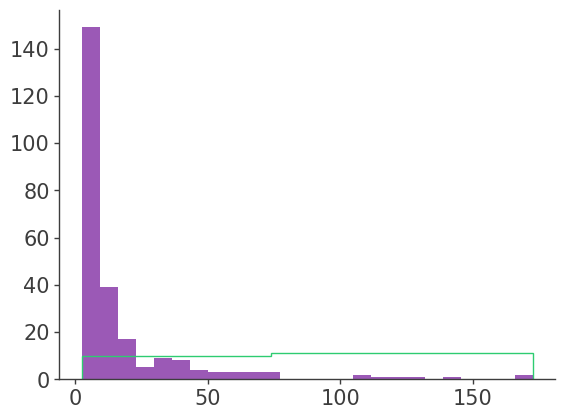

In [8]:
%matplotlib inline
event_file = pyfits.open(myLATdataset.filt_file)
event_times = sorted(event_file["EVENTS"].data["TIME"] - myGRB["MET"])
intervals = event_times[0::10]
_ = plt.hist(event_times)
_ = plt.hist(event_times, intervals, histtype="step")
# plt.show()

tstarts and tstops are defined as strings, with somma separated values for the starts and the ends of the time bins: For example tsrats="0,1,10" and tstops="1,10,20". To convert arrays in string we use these few lines of code:


In [9]:
tstarts = tstops = ""
for t0, t1 in zip(intervals[:-1], intervals[1:]):
    tstarts += "%.4f," % t0
    tstops += "%.4f," % t1
    pass
tstarts = tstarts[:-1].replace("-", "\\-")
tstops = tstops[:-1].replace("-", "\\-")

We can now make an instance the LAT transient builder


In [10]:
analysis_builder = TransientLATDataBuilder(
    myLATdataset.grb_name,
    outfile=myLATdataset.grb_name,
    roi=roi,
    tstarts=tstarts,
    tstops=tstops,
    irf=irfs,
    zmax=zmax,
    galactic_model="template",
    particle_model="isotr template",
    datarepository=".",
)
df = analysis_builder.display(get=True)

outfile                                                       190114873
roi                                                                  10
tstarts               2.6996,3.6358,3.9968,4.4024,4.7375,5.0909,5.54...
tstops                3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.98...
zmax                                                              110.0
emin                                                              100.0
emax                                                           100000.0
irf                                                    p8_transient020e
galactic_model                                                 template
particle_model                                           isotr template
source_model                                                  PowerLaw2
tsmin                                                              20.0
strategy                                                           time
thetamax                                                        

In [11]:
tstops

'3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.6889,7.0117,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165,17.7834,21.4962,30.0798,40.8747,48.7118,73.7262,172.5754'

The run method will run (using gtburst) all the fermitools needed to obtain the needed file for the likelihood analysis (livetimecubes, exposure maps. It will also perfom a simple likelihood analysis with the standard likelihood of the fermitools (pylikelihood). The dataproducts created here will be used by threeML to make the fit.


In [12]:
LAT_observations = analysis_builder.run(include_previous_intervals=True)

Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/scripts/doTimeResolvedLike.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtdiffrsp_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtltcube_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gttsmap_mp.py


         INFO      About to run the following command:                                 ]8;id=752389;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=314695;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#636\636]8;;\
                  /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermi                             
                  tools/GtBurst/scripts/doTimeResolvedLike.py 190114873 --outfile                                  
                  '190114873' --roi 10.000000 --tstarts                                                            
                  '2.6996,3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.68                             
                  89,7.0117,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165                             
                  ,17.7834,21.4962,30.0798,40.8747,48.7118,73.7262' --tstops                                       
                  '3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.6889,7.01                             
                  17,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165,17.783                             
                  4,21.4962,30.0798,40.8747,48.7118,73.7262,172.5754' --zmax                                       
                  110.000000 --emin 100.000000 --emax 100000.000000 --irf                                          
                  'p8_transient020e' --galactic_model 'template' --particle_model                                  
                  'isotr template' --source_model 'PowerLaw2' --tsmin 20.000000                                    
                  --strategy 'time' --thetamax 180.000000 --spectralfiles 'no'                                     
                  --liketype 'unbinned' --optimizeposition 'no' --datarepository '.'                               
                  --ltcube '' --expomap '' --ulphindex -2.000000 --flemin 100.000000                               
                  --flemax 10000.000000 --fgl_mode 'fast'                                                          

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   25.19240     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .29E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:54: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   13.71579     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .58E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA


Requested intervals:
------------------------------------------------------
2.6996               - 3.6358
3.6358               - 3.9968
3.9968               - 4.4024
4.4024               - 4.7375
4.7375               - 5.0909
5.0909               - 5.5471
5.5471               - 5.9896
5.9896               - 6.3998
6.3998               - 6.6889
6.6889               - 7.0117
7.0117               - 7.2936
7.2936               - 7.7731
7.7731               - 8.2167
8.2167               - 8.8763
8.8763               - 9.6573
9.6573               - 10.568
10.568               - 12.0568
12.0568              - 14.6165
14.6165              - 17.7834
17.7834              - 21.4962
21.4962              - 30.0798
30.0798              - 40.8747
40.8747              - 48.7118
48.7118              - 73.7262
73.7262              - 172.5754

Data files:
-----------
eventfile            /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit
ft2file      

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   4.786573     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .14E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   5.901543     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .70E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py 40 40 2 1 /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval3.6358-3.9968/gll_ft1_tr_bn190114873_v00_filt.fit gll_ft1_tr_bn190114873_v00_filt_ltcube.fit P8R3_TRANSIENT020E_V3 20.0 20 gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Starting calculation of region 0.0,0.0 to 20.0,40.0

Completed calculation of region 0.0,0.0 to 20.0,40.0

Starting calculation of region 20.0,0.0 to 40.0,40.0

Completed calculation of region 20.0,0.0 to 40.0,40.0

Spawning 2 jobs...

Combining temporary files...

Deleting temporary files...



time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval3.6358-3.9968/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_f

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   13.43105     FROM MIGRAD    STATUS=CONVERGED     67 CALLS       68 TOTAL
                     EDM=   .19E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtbin evfile=gll_ft1_tr_bn190114873_v00_filt.fit scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit outfile=190114873_LAT_skymap_4.4024-4.7375.fit algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=101 nypix=101 binsz=0.2 coordsys="CEL" xref=54.51 yref=-26.939 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
real 0.18
user 0.14
sys 0.03

Total number of events in the counts map: 10
Total time in Good Time Intervals:        0.3350999355316162
-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_4.4024-4.7375.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' 

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   11.37565     FROM MIGRAD    STATUS=CONVERGED     74 CALLS       75 TOTAL
                     EDM=   .16E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  9.4%

  EXT PARAMETER                            

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   7.632503     FROM MIGRAD    STATUS=CONVERGED     61 CALLS       62 TOTAL
                     EDM=   .99E-06  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  5.3%

  EXT PARAMETER                            

|--------------------|---------------|----------|  ----------|----------|------|
|         Source name|      Par. Name|     Value|       Error|     Units|    TS|
|--------------------|---------------|----------|------------|----------|------|
|GRB                 |               |          |            |          |   145|
|                    |       Integral|    0.0202|     0.00667| ph./cm2/s|      |
|                    |          Index|     -2.16|       0.362|         -|      |
|                    |     LowerLimit|       100|n.a. (fixed)|       MeV|      |
|                    |     UpperLimit|     1e+05|n.a. (fixed)|       MeV|      |
|                    |    Energy flux|  1.23e-05|    5.57e-06| erg/cm2/s|      |
|                    |    Photon flux|    0.0201|     0.00668| ph./cm2/s|      |
|GalacticTemplate    |               |          |            |          |     0|
|                    |          Value|         1|        0.15|         -|      |
|                    |    En

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   10.79486     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .15E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   6.844639     FROM MIGRAD    STATUS=CONVERGED     66 CALLS       67 TOTAL
                     EDM=   .31E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py 40 40 2 1 /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval5.5471-5.9896/gll_ft1_tr_bn190114873_v00_filt.fit gll_ft1_tr_bn190114873_v00_filt_ltcube.fit P8R3_TRANSIENT020E_V3 20.0 20 gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Spawning 2 jobs...

Combining temporary files...

Deleting temporary files...



time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval5.5471-5.9896/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_5.5471-5.9896.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes debug=no gui=n

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   8.317516     FROM MIGRAD    STATUS=CONVERGED     55 CALLS       56 TOTAL
                     EDM=   .68E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   12.58093     FROM MIGRAD    STATUS=CONVERGED     62 CALLS       63 TOTAL
                     EDM=   .10E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig = plt.figure()



Total number of events in the counts map: 11
Total time in Good Time Intervals:        0.2891000509262085
-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_6.3998-6.6889.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' source_model='PowerLaw2'

Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_6.3998-6.6889.xml 0.2891000509262085 )
('SpatialMap', True)
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg 

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   18.30164     FROM MIGRAD    STATUS=CONVERGED     68 CALLS       69 TOTAL
                     EDM=   .14E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_7.0117-7.2936.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' strategy='time' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' tstart='7.0117' tstop='7.2936' ra='54.51' dec='-26.939' irf='p8_transient020e' allowEmpty='no'
time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10.0))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   14.90094     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .44E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   13.18701     FROM MIGRAD    STATUS=CONVERGED     62 CALLS       63 TOTAL
                     EDM=   .24E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  6.5%

  EXT PARAMETER                            

/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval7.2936-7.7731/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 8.37
user 7.55
sys 0.73
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval7.2936-7.7731/gll_ft1_tr_bn190114873_v00_filt.fit
Spacecraft file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit
Exposure map: gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Exposure cube: gll_ft1_tr_bn190114873_v00_filt_ltcube.fit
IRFs: P8R3_TRANSIENT020E_V3
Source model file: 190114873_LAT_xmlmodel_7.2936-7.7731.xml
Optimizer: Minuit

Performing likelihood fit...
Data  10.0
srcName  2.576925063095601e-06
srcName  9.998483483004073
srcName  0.0005808125234028571
srcName  0.000260792030

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   24.59086     FROM MIGRAD    STATUS=CONVERGED     57 CALLS       58 TOTAL
                     EDM=   .13E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   28.24928     FROM MIGRAD    STATUS=CONVERGED     56 CALLS       57 TOTAL
                     EDM=   .18E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using spatial model SpatialMap...
Kept 1 point sources from the FGL catalog
-> gtdolike.py spectralfiles='no' xmlmodel='190114873_LAT_xmlmodel_8.2167-8.8763.xml' liketype='unbinned' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' showmodelimage='no' tsmin='20.0' optimizeposition='no' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' skymap='190114873_LAT_skymap_8.2167-8.8763.fit' flemin='100.000000' flemax='10000.000000'
time -p gtltcube evfile="/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval8.2167-8.8763/gll_ft1_tr_bn190114873_v00_filt.fit" evtable="EVENTS" scfile=__ft2temp.fits sctable="SC_DATA" outfile=gll_ft1_tr_bn190114873_v00_filt_ltcube.fit dcostheta=0.025 binsz=1.0 phibins=1 tmin=0.0 tmax=0.0 file_version="1" zmin

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   29.59265     FROM MIGRAD    STATUS=CONVERGED     73 CALLS       74 TOTAL
                     EDM=   .12E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

sys 0.03

Using 305 data

time -p gtselect infile=gll_ft1_tr_bn190114873_v00_mkt.fit outfile=gll_ft1_tr_bn190114873_v00_filt.fit ra=54.51 dec=-26.939 rad=10.0 tmin=569192237.2833 tmax=569192238.194 emin=100.0 emax=100000.0 zmin=0.0 zmax=110.0 evclass=8 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.12
user 0.08
sys 0.02

Selected 10 events.
time -p gtbin evfile=gll_ft1_tr_bn190114873_v00_filt.fit scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit outfile=190114873_LAT_skymap_9.6573-10.568.fit algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=101 nypix=101 binsz=0.2 coordsys="CEL" xref=54.51 yref=-26.939 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobbe

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   30.55516     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .11E-04  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  6.1%

  EXT PARAMETER                            

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   29.31981     FROM MIGRAD    STATUS=CONVERGED     55 CALLS       56 TOTAL
                     EDM=   .64E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  3.9%

  EXT PARAMETER                            

|--------------------|---------------|----------|  ----------|----------|------|
|         Source name|      Par. Name|     Value|       Error|     Units|    TS|
|--------------------|---------------|----------|------------|----------|------|
|GRB                 |               |          |            |          |   145|
|                    |       Integral|   0.00414|     0.00131| ph./cm2/s|      |
|                    |          Index|     -1.47|       0.274|         -|      |
|                    |     LowerLimit|       100|n.a. (fixed)|       MeV|      |
|                    |     UpperLimit|     1e+05|n.a. (fixed)|       MeV|      |
|                    |    Energy flux|  6.43e-06|    3.07e-06| erg/cm2/s|      |
|                    |    Photon flux|   0.00381|     0.00126| ph./cm2/s|      |
|GalacticTemplate    |               |          |            |          |     1|
|                    |          Value|         1|       0.134|         -|      |
|                    |    En

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   38.58473     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .91E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  4.2%

  EXT PARAMETER                            

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   41.85635     FROM MIGRAD    STATUS=CONVERGED     68 CALLS       69 TOTAL
                     EDM=   .15E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

user 0.39
sys 0.50
/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py 40 40 2 1 /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval14.6165-17.7834/gll_ft1_tr_bn190114873_v00_filt.fit gll_ft1_tr_bn190114873_v00_filt_ltcube.fit P8R3_TRANSIENT020E_V3 20.0 20 gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Starting calculation of region 20.0,0.0 to 40.0,40.0

Completed calculation of region 20.0,0.0 to 40.0,40.0

Starting calculation of region 0.0,0.0 to 20.0,40.0

Completed calculation of region 0.0,0.0 to 20.0,40.0

Spawning 2 jobs...

Combining temporary files...

Deleting temporary files...



time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval14.6165-17.7834/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_ex

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   40.63160     FROM MIGRAD    STATUS=CONVERGED     71 CALLS       72 TOTAL
                     EDM=   .94E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtbin evfile=gll_ft1_tr_bn190114873_v00_filt.fit scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit outfile=190114873_LAT_skymap_21.4962-30.0798.fit algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=101 nypix=101 binsz=0.2 coordsys="CEL" xref=54.51 yref=-26.939 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
real 0.17
user 0.13
sys 0.03

Total number of events in the counts map: 10
Total time in Good Time Intervals:        8.583600044250488
-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_21.4962-30.0798.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fas

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   34.58971     FROM MIGRAD    STATUS=CONVERGED     73 CALLS       74 TOTAL
                     EDM=   .11E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   51.56070     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .14E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

|--------------------|---------------|----------|  ----------|----------|------|
|         Source name|      Par. Name|     Value|       Error|     Units|    TS|
|--------------------|---------------|----------|------------|----------|------|
|GRB                 |               |          |            |          |   131|
|                    |       Integral|  0.000584|    0.000189| ph./cm2/s|      |
|                    |          Index|      -1.3|       0.266|         -|      |
|                    |     LowerLimit|       100|n.a. (fixed)|       MeV|      |
|                    |     UpperLimit|     1e+05|n.a. (fixed)|       MeV|      |
|                    |    Energy flux|  1.11e-06|    5.17e-07| erg/cm2/s|      |
|                    |    Photon flux|    0.0005|    0.000163| ph./cm2/s|      |
|GalacticTemplate    |               |          |            |          |     0|
|                    |          Value|         1|        0.15|         -|      |
|                    |    En

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   66.71287     FROM MIGRAD    STATUS=CONVERGED     64 CALLS       65 TOTAL
                     EDM=   .42E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

sys 0.50
/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py 40 40 2 1 /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval48.7118-73.7262/gll_ft1_tr_bn190114873_v00_filt.fit gll_ft1_tr_bn190114873_v00_filt_ltcube.fit P8R3_TRANSIENT020E_V3 20.0 20 gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Spawning 2 jobs...

Combining temporary files...

Deleting temporary files...



time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval48.7118-73.7262/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_48.7118-73.7262.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes

07:13:35 INFO      The ft2 file does not exist. Please examine!                        ]8;id=612733;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=552240;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=572145;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=656079;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=288299;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=668297;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval10.568-12.0568/gll_ft2_tr_bn190114873_v00.fit                                            

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=757156;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=794357;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=69548;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=675936;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

07:13:36 INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=613694;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=726212;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval12.0568-14.6165/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=684019;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=665518;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=230778;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=117230;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=310581;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=513024;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval14.6165-17.7834/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=130363;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=91194;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=497701;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=170648;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=198317;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=166319;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval17.7834-21.4962/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=325010;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=781154;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=851978;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=399712;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=531403;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=894846;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval2.6996-3.6358/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=980764;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=465729;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=911969;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=299291;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=75545;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=758733;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval21.4962-30.0798/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=814214;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=155916;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=414752;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=939988;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=429460;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=486406;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval3.6358-3.9968/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=149969;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=943087;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=463917;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=412380;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=683597;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=277075;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval3.9968-4.4024/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=240168;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=741122;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=906116;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=429687;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=869194;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=924896;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval30.0798-40.8747/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=558544;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=798998;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=136292;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=655137;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=682925;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=704908;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval4.4024-4.7375/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=142469;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=872674;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=653055;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=755249;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=261995;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=371933;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval4.7375-5.0909/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=329926;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=114105;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=160600;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=746914;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=940656;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=458952;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval40.8747-48.7118/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=400233;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=196208;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=90942;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=660911;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=900944;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=909160;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval48.7118-73.7262/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=370030;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=471500;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=800824;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=520222;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=213906;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=858974;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.0909-5.5471/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=853393;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=895295;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=532864;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=858434;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=214095;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=915769;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.5471-5.9896/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=799264;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=655290;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=611321;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=105735;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=392207;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=292753;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.9896-6.3998/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=245670;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=880476;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=18574;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=131124;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=373088;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=727172;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval6.3998-6.6889/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=60580;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=87953;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=829439;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=863992;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=279592;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=287629;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval6.6889-7.0117/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=914809;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=969382;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=208978;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=64469;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=740606;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=528412;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.0117-7.2936/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=455908;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=822713;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=989014;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=693444;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=284353;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=420991;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.2936-7.7731/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=439102;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=387207;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=660579;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=771981;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=417436;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=845896;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.7731-8.2167/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=921608;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=787655;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=377;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=869305;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=526081;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=356910;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval73.7262-172.5754/gll_ft2_tr_bn190114873_v00.fit                                          

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=926752;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=791677;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=867093;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=100698;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=729549;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=90795;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval8.2167-8.8763/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=150001;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=413091;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=372021;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=898391;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=384296;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=329281;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval8.8763-9.6573/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=562513;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=180021;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=318513;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=503303;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=519696;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=71194;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval9.6573-10.568/gll_ft2_tr_bn190114873_v00.fit                                             

 At this point we can create the FermiLATLike plugins from each of the observation:

In [13]:
LAT_plugins = {}
for l in LAT_observations:
    LAT_name = "LAT_%06.3f-%06.3f" % (float(l.tstart), float(l.tstop))
    LAT_plugins[LAT_name] = l.to_LATLike()
    pass

For reference, these are the keys save in the dictionary.


In [14]:
LAT_plugins.keys()

dict_keys(['LAT_10.568-12.057', 'LAT_12.057-14.617', 'LAT_14.617-17.783', 'LAT_17.783-21.496', 'LAT_02.700-03.636', 'LAT_21.496-30.080', 'LAT_03.636-03.997', 'LAT_03.997-04.402', 'LAT_30.080-40.875', 'LAT_04.402-04.737', 'LAT_04.737-05.091', 'LAT_40.875-48.712', 'LAT_48.712-73.726', 'LAT_05.091-05.547', 'LAT_05.547-05.990', 'LAT_05.990-06.400', 'LAT_06.400-06.689', 'LAT_06.689-07.012', 'LAT_07.012-07.294', 'LAT_07.294-07.773', 'LAT_07.773-08.217', 'LAT_73.726-172.575', 'LAT_08.217-08.876', 'LAT_08.876-09.657', 'LAT_09.657-10.568'])

Now we can perform the fit in each bin. Note that we set the model, and we set some initial values. All the resulting joint likelihood objects are stored in a dictioonary to be used later for plotting.


In [15]:
results = {}
update_logging_level("DEBUG")

for T0, T1 in zip(intervals[:-1], intervals[1:]):
    GRB = PointSource(
        "GRB", ra=myGRB["RA"], dec=myGRB["DEC"], spectral_shape=Powerlaw_flux()
    )
    model = Model(GRB)
    model.GRB.spectrum.main.Powerlaw_flux.a = 100.0 * u.MeV
    model.GRB.spectrum.main.Powerlaw_flux.b = 10000.0 * u.MeV
    model.GRB.spectrum.main.Powerlaw_flux.F = 1.0
    LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
    LAT_model_name = ("LAT%dX%d" % (T0, T1)).replace("-", "n")
    datalist = DataList(LAT_plugins[LAT_name])
    model["GRB.spectrum.main.Powerlaw_flux.F"].bounds = (1e-6, 1e6)
    model["GRB.spectrum.main.Powerlaw_flux.F"].value = 1e-2
    model["GRB.spectrum.main.Powerlaw_flux.index"].value = -2.2
    model["GRB.spectrum.main.Powerlaw_flux.index"].bounds = (-3, 0)
    jl = JointLikelihood(model, datalist, verbose=False)
    model[LAT_model_name + "_GalacticTemplate_Value"].value = 1.0
    model[LAT_model_name + "_GalacticTemplate_Value"].fix = True
    model[LAT_model_name + "_GalacticTemplate_Value"].fix = True
    # model.display( complete=True )
    jl.set_minimizer("minuit")
    jl.fit(compute_covariance=True)
    results[LAT_name] = jl
    pass

07:13:44 DEBUG     adding child F                                                                   ]8;id=659954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=994738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

07:13:45 DEBUG     adding child index                                                               ]8;id=711914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=116971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=567689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=792585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=715229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=256738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=614232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=502704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=741525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=957562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=355567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=806680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=549844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=927834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=637613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=35098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=567120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=234703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=115056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=197532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=289485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=507133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=129575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=712222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=781256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=708529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=81262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=190300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

07:13:45 DEBUG     creating new MLE analysis                                                 ]8;id=66988;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=619418;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=868291;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=483952;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:13:54 DEBUG     Removing non-needed files                                                    ]8;id=666880;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=984213;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=468576;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=455708;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=522971;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=273901;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=597979;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=264746;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:13:54 DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=74133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=337316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=414218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=956705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=885905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=390787;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=713248;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=435591;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=400664;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=82476;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=896709;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=15031;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=498457;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=765635;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=69606;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=718109;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=730921;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.0352544023409047                      ]8;id=65207;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=654583;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.99999999999764                    ]8;id=288639;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=734991;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT2X3_IsotropicTemplate_Normalization = 1.4999999932566102                  ]8;id=311296;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=589775;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=424891;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=223507;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   75.9 percent of samples have been thrown away because they failed the   ]8;id=270129;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=443154;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=475563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=216579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=62042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=239811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=148497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=662295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=399173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=844843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=798321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=73528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=970221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=456464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=820297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=904845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=478126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=826625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=638153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=476116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=1446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=505854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=693615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=201210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=890640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=510246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=931082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=177315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=865893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=223068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=968035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=76380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F        (9.2 -2.5 +3.4) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index   -3.0000000 +/- 0.0000018             
LAT2X3_IsotropicTemplate_Normalization         1.5000 +/- 0.0022

Correlation matrix:

1.00  0.00 -0.00
 0.00  1.00 -0.00
-0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT2X3         40.674435
total          40.674435

Values of statistical measures:

statistical measures
AIC              79.34887
BIC              81.34887

         DEBUG     adding child F                                                                   ]8;id=966902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=313937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=253066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=883396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=334640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=492548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=848925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=696561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=360751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=355499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=995269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=802235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=402391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=617545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=313942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=736452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=497865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=256287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=375270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=476948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=945477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=119556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=941599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=386093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=28169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=511939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=866667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=224665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=957314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=620544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=392100;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=181036;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=294147;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=796549;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:14:03 DEBUG     Removing non-needed files                                                    ]8;id=822407;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=946314;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=165889;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=266026;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=298945;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=352194;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=664190;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=582846;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:14:03 DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=522752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=218249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=182049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=632035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=972757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=397817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=977484;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=374741;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=902504;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=857886;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=141907;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=500625;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=355329;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=743750;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=146616;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=448760;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=135627;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=51183;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6214002832513499                      ]8;id=787999;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=413748;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.999999990196391                   ]8;id=241791;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=237493;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT3X3_IsotropicTemplate_Normalization = 1.4999986085998898                  ]8;id=822698;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=667251;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=830159;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=141740;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   75.66000000000001 percent of samples have been thrown away because they ]8;id=598609;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=995722;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  failed the constraints on the parameters. This results might not be                              
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=22493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=160607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=177829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=690953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=862663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=196140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=781655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=890636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=772283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=266485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=147405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=96362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=660720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=450764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=866826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=841299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=341120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=22600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=896694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=299815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=571188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=40754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=960369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=416196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=129106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=234633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=627028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=258292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.4 -0.6 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index      -3.00000 +/- 0.00010             
LAT3X3_IsotropicTemplate_Normalization          1.500 +/- 0.035

Correlation matrix:

1.00  0.00  0.00
0.00  1.00 -0.00
0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT3X3         29.524707
total          29.524707

Values of statistical measures:

statistical measures
AIC             57.049414
BIC             59.049414

         DEBUG     adding child F                                                                   ]8;id=525090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=18795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=616957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=269609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=636078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=138486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=148119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=838075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=696678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=320623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=948138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=54933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=63876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=835627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=185362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=57055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=992687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=59871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=608087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=815045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=449357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=715206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=399206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=312242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=120492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=528161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=605193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=653532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=600440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=530092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=578622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=560629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=544760;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=897009;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=8536;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=418271;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:14:11 DEBUG     Removing non-needed files                                                    ]8;id=253100;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=385926;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=977937;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=691609;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=757982;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=12079;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=412112;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=307523;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:14:11 DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=296397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=67661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=873498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=590482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=796574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=51660;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=501476;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=997557;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=17946;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=181150;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=142379;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=74216;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=214029;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=236695;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=653230;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

07:14:12 DEBUG     Restoring best fit:                                                          ]8;id=833271;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=311859;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6740288325393682                      ]8;id=274759;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=660638;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.9697989727745715                  ]8;id=135689;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=394592;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT3X4_IsotropicTemplate_Normalization = 0.5000002063664295                  ]8;id=949082;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=725632;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=574754;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=523610;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   74.2 percent of samples have been thrown away because they failed the   ]8;id=372282;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=84649;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

07:14:12 DEBUG     adding child ra                                                                  ]8;id=286536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=11701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=291463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=833993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=806779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=172252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=830318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=10107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=265484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=782765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=459874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=461769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=602174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=585942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=124425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=454235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=856340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=876428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=751700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=214159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=345672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=923401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=817075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=427115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=930071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=964866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=630159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=451242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=447726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=602500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=157972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=720880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=58216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=566855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.1 -0.6 +0.8) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -3.0 +/- 0.5             
LAT3X4_IsotropicTemplate_Normalization  (5.00 +/- 0.26) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT3X4         19.890601
total          19.890601

Values of statistical measures:

statistical measures
AIC             37.781202
BIC             39.781202

         DEBUG     adding child F                                                                   ]8;id=755664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=683173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=89124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=83971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=79956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=575827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=12346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=594069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=218785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=238849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=140039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=672168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=90334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=606971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=623791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=708631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=593543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=623036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=186161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=501482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=856258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=867708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=810956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=758302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=746423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=547000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=960702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=956039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=907409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=629866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=787133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=167670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=98621;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=986958;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=845147;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=947122;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:14:20 DEBUG     Removing non-needed files                                                    ]8;id=269696;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=67152;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=546905;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=258499;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=26566;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=329529;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=113067;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=718866;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:14:20 DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=323143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=375952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=540182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=106336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=725785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=610129;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=468440;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=556774;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=943917;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=40595;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=554555;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=964721;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=534376;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=684426;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=462861;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=361564;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=919250;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6356358474267303                      ]8;id=669686;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=651533;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.493350750381729                   ]8;id=355461;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=329726;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT4X4_IsotropicTemplate_Normalization = 0.5000010514249715                  ]8;id=742123;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=659636;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=103984;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=467531;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   55.50000000000001 percent of samples have been thrown away because they ]8;id=299557;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=625730;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  failed the constraints on the parameters. This results might not be                              
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=239199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=383350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=973755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=939115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=567239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=908372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=556580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=182989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=684560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=400856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=494229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=561846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=973056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=239448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=75489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=37436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=736180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=689338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=478533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=947269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=339037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=232999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=493294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=151422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=826120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=370733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=8568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=106761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=350137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=613937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=460608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=59708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=455068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=392246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT4X4_IsotropicTemplate_Normalization    (5.0 +/- 0.7) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X4         21.005797
total          21.005797

Values of statistical measures:

statistical measures
AIC             40.011593
BIC             42.011593

         DEBUG     adding child F                                                                   ]8;id=738124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=373252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=834460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=708409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=526401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=567707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=173662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=343334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=371131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=919987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=185704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=561357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=615781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=385198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=247791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=205861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=104586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=668678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=781264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=219032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=854860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=663766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=942080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=408067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

07:14:21 DEBUG     path is now: spectrum.main                                                      ]8;id=741880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=461859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=429498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=228083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=661366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=139544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=807059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

07:14:21 DEBUG     creating new MLE analysis                                                 ]8;id=66013;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=902612;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=288084;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=459086;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:14:29 DEBUG     Removing non-needed files                                                    ]8;id=635943;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=691115;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=168384;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=684239;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=959745;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=292074;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=509182;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=25426;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:14:29 DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=572543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=94489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=443204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=10684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=729184;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=404082;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=720444;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=924161;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=540354;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=58572;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=929062;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=938751;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=610031;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=960775;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=991311;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=939601;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6972341426974515                      ]8;id=200415;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=978407;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1561451176003112                  ]8;id=120361;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=629007;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT4X5_IsotropicTemplate_Normalization = 0.5000012928966517                  ]8;id=270915;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=90338;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=490691;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=284312;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.44 percent of samples have been thrown away because they failed the  ]8;id=109506;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=231181;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=836133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=503812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=344213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=523169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=342743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=16882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=46634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=689256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=834623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=228756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=233518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=334845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=837582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=892958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=73640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=710464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=373028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=354241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=537279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=696611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=312016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=283439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=602526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=281508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=876972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=585201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=674505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=46228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=562591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=980418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=458397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=849045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.0 -0.6 +0.8) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.2 +/- 0.4             
LAT4X5_IsotropicTemplate_Normalization    (5.0 +/- 0.6) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X5          28.53492
total           28.53492

Values of statistical measures:

statistical measures
AIC              55.06984
BIC              57.06984

         DEBUG     adding child F                                                                   ]8;id=86472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=344084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=595834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=849896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=574591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=612210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=989517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=397253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=635199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=36600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=645747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=891683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=867173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=774873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=971845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=381432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=60432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=112950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=517717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=726210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=814970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=875805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=566582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=385013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=814813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=520143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=798671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=703701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=236894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=501320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=602780;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=645616;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=711935;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=257130;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:14:37 DEBUG     Removing non-needed files                                                    ]8;id=328265;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=569648;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=480317;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=393504;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=883538;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=285532;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=245452;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=865022;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:14:37 DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=775347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=56063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=577455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=913235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=277155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=720897;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=551322;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=73987;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=194846;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=833330;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=525027;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=378490;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=396659;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=477944;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=670551;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=38609;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=451611;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9618894075014957                      ]8;id=275519;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=851812;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.3571830585982771                  ]8;id=744640;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=154561;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X5_IsotropicTemplate_Normalization = 0.5000000505896941                  ]8;id=416404;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=348334;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=357068;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=535013;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.28 percent of samples have been thrown away because they failed the  ]8;id=974958;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=917177;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=733862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=254096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=44651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=198573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=723151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=552569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=103872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=831931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=340168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=180421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=267256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=970130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=915581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=511409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=639379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=271189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=684126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=99783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=680211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=834171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=437488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

07:14:38 DEBUG     adding child main                                                                ]8;id=637578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=873503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=38159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=314888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=124471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=214993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=643987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=232969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=907680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=602590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.09 -0.32 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.36 +/- 0.28             
LAT5X5_IsotropicTemplate_Normalization    (5.00 +/- 0.14) x 10^-1

Correlation matrix:

1.00 -0.25  0.00
-0.25  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X5          24.17769
total           24.17769

Values of statistical measures:

statistical measures
AIC             46.355381
BIC             48.355381

         DEBUG     adding child F                                                                   ]8;id=792356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=349512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=568011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=54486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=222582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=170263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=627158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=216108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=38255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=487774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=239811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=949145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=877897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=711369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=626519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=720756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=460329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=182066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=325222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=276833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=921862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=633843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=835793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=224870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=231471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=808187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=943287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=589145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=582078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

07:14:38 DEBUG     creating new MLE analysis                                                 ]8;id=57365;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=434176;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=98906;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=437802;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:14:46 DEBUG     Removing non-needed files                                                    ]8;id=182269;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=990853;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=859520;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=174238;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=763636;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=674980;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=706998;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=407471;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:14:46 DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=315264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=512758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=614789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=235768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=136009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=640637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=566806;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=258915;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=987045;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=935260;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=978386;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=327931;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=864369;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=215976;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=788214;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=739001;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=738784;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=472338;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7988486401117976                      ]8;id=582140;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=575189;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.124311369002779                   ]8;id=362667;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=427686;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X5_IsotropicTemplate_Normalization = 0.5000216811989323                  ]8;id=40355;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=532702;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=451784;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=482036;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   52.019999999999996 percent of samples have been thrown away because     ]8;id=334846;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=58806;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=735193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=792735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=922734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=927079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=463485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=815528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=557155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=276029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=967981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=529138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=60134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=684594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=146371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=563497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=699574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=947415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=145106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=814657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=714697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=608775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=129790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=943471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=358986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=76960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=99201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=248601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=951816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=998805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=930386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=29607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=264964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=106594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=59632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=759728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.6 -0.4 +0.6) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.1 +/- 0.4             
LAT5X5_IsotropicTemplate_Normalization    (5.0 +/- 2.2) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X5         22.737285
total          22.737285

Values of statistical measures:

statistical measures
AIC             43.474569
BIC             45.474569

         DEBUG     adding child F                                                                   ]8;id=105817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=359150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=892433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=768098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=730529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=670124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=259738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=174630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=490767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=636952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=119135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=697362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=596977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=982651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=871307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=657677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=179974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=212425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=994216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=303891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=848052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=566668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=23032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=826957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=285371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=994057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=327245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=599847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=557254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=397302;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=794038;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=294473;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=182574;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:14:54 DEBUG     Removing non-needed files                                                    ]8;id=520969;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=137179;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=306820;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=331610;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=936201;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=660138;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=637131;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=516458;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:14:54 DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=247115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=358874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=767254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=278983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=325196;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=327042;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=394230;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=184411;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=265955;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=179974;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=113695;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=223096;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=81308;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=691383;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

07:14:55 DEBUG     Restoring best fit:                                                          ]8;id=456586;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=615300;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7205833403897994                      ]8;id=186513;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=382836;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.517745472361178                   ]8;id=759051;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=110216;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X6_IsotropicTemplate_Normalization = 1.1915964373561894                  ]8;id=902934;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=622392;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=438031;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=670470;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   53.059999999999995 percent of samples have been thrown away because     ]8;id=171041;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=934416;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

07:14:55 DEBUG     adding child ra                                                                  ]8;id=889441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=461344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=406951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=796200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=216393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=463811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=778166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=811749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=204657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=945603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=160458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=159437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=613086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=668725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=772701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=714438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=96745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=32118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=42145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=237110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=998213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=686937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=128959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=414614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=772039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=128199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=265526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=26677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=254611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=388707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=787545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=896558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=19754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=629313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=843886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=936811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=732955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.9 -0.5 +0.7) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT5X6_IsotropicTemplate_Normalization              1.2 +/- 0.7

Correlation matrix:

1.00 -0.30 -0.00
-0.30  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X6         25.899097
total          25.899097

Values of statistical measures:

statistical measures
AIC             49.798193
BIC             51.798193

         DEBUG     adding child F                                                                   ]8;id=983000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=161140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=396479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=183245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=842732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=76992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=6424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=644120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=733945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=223890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=190668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=15345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=569379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=82425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=834953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=608173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=158046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=817903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=57447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=547258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=914931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=878563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=495793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=650774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=910827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=120734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=250230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=179753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=631053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=214187;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=77985;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=498466;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=182030;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:15:03 DEBUG     Removing non-needed files                                                    ]8;id=783876;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=927740;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=492704;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=335412;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=38790;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=906143;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=972700;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=759348;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:15:03 DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=445256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=235537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=516188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=205348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=571227;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=654548;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=667859;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=132472;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=644331;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=704559;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=501099;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=916350;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=362442;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=106207;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=781811;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=356399;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.5965227044098305                      ]8;id=684977;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=988065;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.940019800051781                   ]8;id=365193;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=860985;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT6X6_IsotropicTemplate_Normalization = 0.5000000003385661                  ]8;id=783775;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=907841;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=312310;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=32415;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.32 percent of samples have been thrown away because they failed the  ]8;id=109485;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=575856;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=557213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=750279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=946003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=512126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=129690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=633757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=209428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=623478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=286408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=985235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=771362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=926957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=172122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=69900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=82519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=355415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=465597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=904771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=699723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=456945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=535279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=115584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=420371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=105938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=571295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=999733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=666225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

07:15:04 DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=561627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.5 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.94 +/- 0.31             
LAT6X6_IsotropicTemplate_Normalization  (5.000 +/- 0.012) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT6X6         24.346972
total          24.346972

Values of statistical measures:

statistical measures
AIC             46.693944
BIC             48.693944

         DEBUG     adding child F                                                                   ]8;id=862043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=24589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=142065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=990844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=270144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=604458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=731426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=114533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=82075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=357132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=386345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=404473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=396333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=837675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=882005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=339130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=19315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=907512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=584311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=798266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=707590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=292279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=59110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=690215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=278789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=880330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=114017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=431695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=791142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=675722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=174781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=725366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

07:15:04 DEBUG     creating new MLE analysis                                                 ]8;id=444975;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=405678;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=982042;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=600259;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:15:12 DEBUG     Removing non-needed files                                                    ]8;id=141451;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=889100;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=640377;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=303172;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=566118;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=62475;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=212044;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=365808;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:15:12 DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=142682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=329039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=515460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=892490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=670485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=365630;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=828852;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=705435;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=362820;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=86809;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=197634;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=8456;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=712349;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=396194;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=748366;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=842044;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=203346;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6911011468022543                      ]8;id=109503;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=148565;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.260509577977856                   ]8;id=341415;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=673111;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT6X7_IsotropicTemplate_Normalization = 1.4999750447706044                  ]8;id=170606;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=180591;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=873203;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=181118;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   52.88 percent of samples have been thrown away because they failed the  ]8;id=660847;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=689780;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=938448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=777444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=871770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=114951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=361672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=9330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=267691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=942706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=238172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=609251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=739284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=169424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=837804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=371891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=917291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=660621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=71454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=194066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=353561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=630642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=982024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=988357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=479700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=608222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=154030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=937978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=157839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=775271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=739692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=965246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=742716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.0 -0.6 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.3 +/- 0.4             
LAT6X7_IsotropicTemplate_Normalization              1.5 +/- 0.5

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT6X7         21.119217
total          21.119217

Values of statistical measures:

statistical measures
AIC             40.238435
BIC             42.238435

         DEBUG     adding child F                                                                   ]8;id=39655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=121973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=675492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=322024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=878963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=334919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=454649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=235899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=180669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=821692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=384473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=995226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=38545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=823680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=255840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=869656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=849513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=865247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=319473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=339640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=376997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=480483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=690614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=407284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=870873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=723911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=699858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=524049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=899055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=495217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=780814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=786910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=68186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=91477;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=733131;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=500098;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=92312;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:15:20 DEBUG     Removing non-needed files                                                    ]8;id=715510;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=125029;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=250395;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=227625;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=328948;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=237451;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=3544;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=655035;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:15:20 DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=58931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=153648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=832380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=353375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=301018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=699155;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=622771;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=162718;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=353143;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=950809;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=474997;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=801047;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=735076;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=966382;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=168399;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

07:15:21 DEBUG     Restoring best fit:                                                          ]8;id=689844;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=50001;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6355787556887902                      ]8;id=856148;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=802577;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8762427213862418                  ]8;id=336140;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=773922;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X7_IsotropicTemplate_Normalization = 0.5000026607773159                  ]8;id=533697;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=40696;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=753984;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=649836;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   48.58 percent of samples have been thrown away because they failed the  ]8;id=628861;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=452247;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

07:15:21 DEBUG     adding child ra                                                                  ]8;id=312944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=775880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=962238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=877476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=18896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=606544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=227234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=118189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=748052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=71070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=628563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=222780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=200880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=598891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=279779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=494563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=499309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=342738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=623151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=536494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=567112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=913257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=749573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=463261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=682524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=3355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=283287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=28368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=284939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=769225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=480336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=769864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=454285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=650530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=537728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index            -1.88 +/- 0.32             
LAT7X7_IsotropicTemplate_Normalization    (5.0 +/- 1.0) x 10^-1

Correlation matrix:

1.00 -0.30 -0.00
-0.30  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X7         27.685109
total          27.685109

Values of statistical measures:

statistical measures
AIC             53.370219
BIC             55.370219

         DEBUG     adding child F                                                                   ]8;id=73705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=619905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=549020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=355232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=223720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=864511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=192986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=492945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=121512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=39952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=350440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=63124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=915832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=882128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=388715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=687443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=767487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=248719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=614027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=118238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=536828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=716503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=140920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=856563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=525296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=693656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=190460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=924982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=10880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=812042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=629294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=414009;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=909620;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=99590;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=921479;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:15:29 DEBUG     Removing non-needed files                                                    ]8;id=693843;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=752023;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=117423;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=606606;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=768893;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=839253;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=264128;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=354623;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:15:29 DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=138089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=975666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=541756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=329659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=892026;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=514526;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=789724;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=787962;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=145984;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=149737;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=734079;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=320667;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=415166;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=665840;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=442755;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=894053;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.8744278317060745                      ]8;id=928504;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=850923;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8169109932053746                  ]8;id=856262;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=425259;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X7_IsotropicTemplate_Normalization = 0.5000000060552232                  ]8;id=135534;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=541810;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=386797;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=691730;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.4 percent of samples have been thrown away because they failed the   ]8;id=724958;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=493831;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=426941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=463767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=776190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=257209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=357928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=268847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=881434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=550777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=798194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=525625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=696838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=344173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=165664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=842023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=664926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=294337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=332379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=384851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=541060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=725301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=985010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=126291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=829116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=19560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=259936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=23110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=344923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=228569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=42517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=286016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=328029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=422463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=217881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=908842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.3 -0.4 +0.5) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index            -1.82 +/- 0.31             
LAT7X7_IsotropicTemplate_Normalization  (5.00 +/- 0.04) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X7          33.40629
total           33.40629

Values of statistical measures:

statistical measures
AIC              64.81258
BIC              66.81258

         DEBUG     adding child F                                                                   ]8;id=638872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=129849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=981867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=456529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=380645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=348668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=416298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=475802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=571208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=279177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=98618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=704414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=31631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=287138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=856333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=496200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=135514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=323852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=761588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=314070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=586424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=792927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=442569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=237929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=723165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=727864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=572416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=33798;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=219981;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=726193;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=932574;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:15:37 DEBUG     Removing non-needed files                                                    ]8;id=607822;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=416044;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=212167;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=652505;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=817521;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=233934;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=939128;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=921632;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:15:37 DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=244677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=348239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=246380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=251401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=407528;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=893121;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=87329;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=248721;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=693004;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=678537;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=431193;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=934310;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=604793;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=30843;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=661928;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=865680;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7448000298623958                      ]8;id=806968;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=831336;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.621535036513796                   ]8;id=202525;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=84008;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X8_IsotropicTemplate_Normalization = 1.4997559272529473                  ]8;id=115103;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=565393;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=747956;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=228656;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

07:15:38 WARNING   61.12 percent of samples have been thrown away because they failed the  ]8;id=121678;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=476099;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

07:15:38 DEBUG     adding child ra                                                                  ]8;id=248184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=99686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=518956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=514576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=47363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=198231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=763830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=45210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=879355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=937292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=423395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=764562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=375911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=549664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=820230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=562647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=269645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=283263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=786149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=679339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=677550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=827520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=651734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=708263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=32100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=451467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=51838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=58738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=906501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=845059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.8 -0.5 +0.7) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.6 +/- 0.5             
LAT7X8_IsotropicTemplate_Normalization              1.5 +/- 0.5

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X8         30.004254
total          30.004254

Values of statistical measures:

statistical measures
AIC             58.008508
BIC             60.008508

         DEBUG     adding child F                                                                   ]8;id=351870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=539356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=960253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=719138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=245864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=447687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=889105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=527815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=616197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=357291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=457900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=761540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=825040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=618422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=36084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=652474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=980276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=505069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=260061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=939082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=497738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=828045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=201038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=913702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=85157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=530711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=932263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=257748;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=15615;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=416961;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=922368;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:15:46 DEBUG     Removing non-needed files                                                    ]8;id=76428;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=560254;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=285628;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=20644;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=21585;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=617839;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=656426;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=136651;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:15:46 DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=88380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=535244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=948846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=560909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=953864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=139891;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=346521;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=826452;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=524111;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=835777;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=738093;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=43685;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=829138;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=351424;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=56754;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=282960;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=514877;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9668846079551272                      ]8;id=865043;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=737480;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1676492895104045                  ]8;id=957630;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=377657;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT8X8_IsotropicTemplate_Normalization = 0.5000001067506735                  ]8;id=998857;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=459506;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=939952;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=386854;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.66 percent of samples have been thrown away because they failed the  ]8;id=449832;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=524810;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=996877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=474483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=622888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=344753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=217022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=885993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=676949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=11056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=364840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=619132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=473413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=917896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=827707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=670139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=580700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=639599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=237312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=982004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=400838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=278865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=805449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=635750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=760413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=41502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=528299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=921713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=251309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=842608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=89894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=230330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=289820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=554517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=801509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=830128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.08 -0.31 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index                -2.2 +/- 0.4             
LAT8X8_IsotropicTemplate_Normalization    (5.00 +/- 0.17) x 10^-1

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT8X8         28.291719
total          28.291719

Values of statistical measures:

statistical measures
AIC             54.583439
BIC             56.583439

         DEBUG     adding child F                                                                   ]8;id=627795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=195595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=623476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=96155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=448195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=209424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=882126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=550279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=535644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=694012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=51445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=262904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=664702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=440643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=54081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=157189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=846049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=794731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=387702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=622305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=828269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=728364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=659772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=832957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=733737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=527077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=95738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=411710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

07:15:47 WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=470360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=173295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

07:15:47 DEBUG     creating new MLE analysis                                                 ]8;id=817543;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=407282;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=440058;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=17866;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:15:54 DEBUG     Removing non-needed files                                                    ]8;id=231174;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=91752;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=102025;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=356021;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=972427;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=385191;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=675834;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=466083;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:15:54 DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=338435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=951725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=541852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=437911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=119442;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=764153;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

07:15:55 INFO      set the minimizer to minuit                                             ]8;id=304197;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=218116;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=77073;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=758950;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=947772;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=853596;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=763892;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=293598;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=936284;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=506783;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9981216797824937                      ]8;id=250908;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=58365;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1759721373894916                  ]8;id=808280;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=318150;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT8X9_IsotropicTemplate_Normalization = 1.4999999990748192                  ]8;id=826788;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=866422;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=129482;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=315901;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.32 percent of samples have been thrown away because they failed the  ]8;id=810050;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=293831;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

07:15:55 DEBUG     adding child ra                                                                  ]8;id=138413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=763876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=74050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=637027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=206966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=245188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=360272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=513124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=456251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=250370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=53253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=85745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=358606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=500012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=775868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=871889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=579331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=446271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=247648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=480787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=980782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=999937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=290075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=313926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=10869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=703072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=378383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=811714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=623901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=837210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=752514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.00 -0.27 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.18 +/- 0.35             
LAT8X9_IsotropicTemplate_Normalization          1.5000 +/- 0.0008

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT8X9         42.093738
total          42.093738

Values of statistical measures:

statistical measures
AIC             82.187475
BIC             84.187475

         DEBUG     adding child F                                                                   ]8;id=182224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=14494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=929363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=364559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=296380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=478980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=984030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=100279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=698520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=896214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=101899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=49971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=892829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=978800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=436808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=128464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=49025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=283813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=545466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=480942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=165913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=253997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=671458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=882120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=616801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=42631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=485716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=647079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=733844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=524584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=478131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=664617;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=552475;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=707721;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=953850;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:16:03 DEBUG     Removing non-needed files                                                    ]8;id=360403;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=447129;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=313557;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=612159;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=991455;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=955429;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=50256;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=616311;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:16:03 DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=322536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=394242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=904436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=89533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=668190;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=602098;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=806819;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=398684;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=933116;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=739761;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=206871;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=888668;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=264136;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=332755;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=578571;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=60748;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.1665113563245555                      ]8;id=472193;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=966602;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.728444394780525                   ]8;id=836650;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=319915;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT9X10_IsotropicTemplate_Normalization = 1.499999995054957                  ]8;id=732262;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=581753;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=704475;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=170035;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.42 percent of samples have been thrown away because they failed the  ]8;id=375007;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=406371;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=945442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=764899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=135864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=468390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=312458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=179412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=126328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=828511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=777467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=114721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=76215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=664180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=74384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=273845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=536240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=75770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=221367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=215313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=872689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=411730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=500950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=276484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=861489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=563964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=952998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=570800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=793366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=285015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=701356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=731371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F        (6.8 -1.9 +2.7) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index             -1.73 +/- 0.30             
LAT9X10_IsotropicTemplate_Normalization        1.5000 +/- 0.0009

Correlation matrix:

1.00 -0.29 -0.00
-0.29  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT9X10          43.35743
total            43.35743

Values of statistical measures:

statistical measures
AIC             84.714859
BIC             86.714859

07:16:04 DEBUG     adding child F                                                                   ]8;id=806980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=353763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=363398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=478879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=53600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=3344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=142682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=494635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=206624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=268031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=356834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=521928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=707245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=259748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=12339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=809663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=714921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=676790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=569416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=96827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=863223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=757787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=374780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=438588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=702209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=272497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=251932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=404623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

07:16:04 DEBUG     creating new MLE analysis                                                 ]8;id=660522;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=380402;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=215598;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=143607;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:16:12 DEBUG     Removing non-needed files                                                    ]8;id=359781;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=262039;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=773569;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=415389;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=853313;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=490755;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=572651;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=692592;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:16:12 DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=152206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=935758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=691697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=9673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=639093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=884166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=552557;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=722789;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=96160;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=696948;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=280285;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=192385;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=756560;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=828084;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=715304;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=861755;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=928632;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=610572;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.415686253987546                       ]8;id=846538;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=681368;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.46849894703508                    ]8;id=896360;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=419763;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT10X12_IsotropicTemplate_Normalization = 1.4997336615722117                ]8;id=174319;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=815258;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=882350;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=296288;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.0 percent of samples have been thrown away because they failed the   ]8;id=741874;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=216852;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=484869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=810555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=629420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=931631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=504705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=5063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=121865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=400419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=393811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=731632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=943948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=301356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=586502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=950605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=802122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=213228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=592355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=278586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=614531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=602380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=872170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=437372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=244741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=595565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=459129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=667285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=638977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=587732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=769163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=969716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (3.8 -1.1 +1.5) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.47 +/- 0.28             
LAT10X12_IsotropicTemplate_Normalization            1.50 +/- 0.28

Correlation matrix:

1.00 -0.27 -0.00
-0.27  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT10X12         44.700357
total            44.700357

Values of statistical measures:

statistical measures
AIC             87.400714
BIC             89.400714

         DEBUG     adding child F                                                                   ]8;id=118032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=621258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=906200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=643871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=959421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=229358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=588642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=698807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=883380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=162782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=639211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=915849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=107353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=117617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=450927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=681027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=77396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=560183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=614089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=634642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=736070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=222543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=833335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=733093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=373446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=330934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=253444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=953813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=712126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=959404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=737761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=8684;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=791326;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=626832;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=435826;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:16:20 DEBUG     Removing non-needed files                                                    ]8;id=186527;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=855397;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=122968;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=448993;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=765363;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=764727;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=746385;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=609481;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:16:20 DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=413541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=242544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=613020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=736783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=941807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=731027;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=842343;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=637169;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=969134;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=570587;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=515460;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=862658;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=825799;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=426215;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=266776;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=993838;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=937979;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.5668056304239846                      ]8;id=40754;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=129921;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.4717000458817178                  ]8;id=853288;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=626685;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT12X14_IsotropicTemplate_Normalization = 0.500009523390559                 ]8;id=818616;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=398861;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=289667;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=579904;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

07:16:21 WARNING   56.599999999999994 percent of samples have been thrown away because     ]8;id=590707;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=519072;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

07:16:21 DEBUG     adding child ra                                                                  ]8;id=559444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=696955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=273299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=991850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=956586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=588969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=762763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=323622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=163448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=841936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=738610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=434428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=31746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=602949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=585077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=52871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=328870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=730807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=185324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=270762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=332346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=813335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=652038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=395060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=792324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=145436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=562709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=960022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=144582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=305633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=969214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=55686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.7 -0.8 +1.1) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index                -2.5 +/- 0.4             
LAT12X14_IsotropicTemplate_Normalization    (5.0 +/- 0.9) x 10^-1

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT12X14         43.357892
total            43.357892

Values of statistical measures:

statistical measures
AIC             84.715783
BIC             86.715783

         DEBUG     adding child F                                                                   ]8;id=573681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=286720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=568319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=940576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=88356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=873701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=628073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=936404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=438994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=659746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=122899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=519087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=119906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=937811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=156438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=87470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=700476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=362745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=25527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=524660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=609201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=639734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=274919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=857947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=423459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=182423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=973523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=27146;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=382770;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=287997;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=737317;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:16:29 DEBUG     Removing non-needed files                                                    ]8;id=34117;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=67818;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=558990;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=532824;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=702407;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=166546;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=516539;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=462359;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:16:29 DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=54873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=218010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=890060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=97260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=378428;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=818874;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=830877;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=996476;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=836979;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=375626;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=367895;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=360697;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=996147;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=893785;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=561540;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=650568;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.699540588239001                       ]8;id=953139;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=999851;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.7821007118364733                  ]8;id=901189;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=432222;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT14X17_IsotropicTemplate_Normalization = 1.473368589203411                 ]8;id=511461;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=985215;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=284546;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=817108;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   45.48 percent of samples have been thrown away because they failed the  ]8;id=41985;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=624609;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=73565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=594583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=623129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=457818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=673388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=804646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=629243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=251318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=626443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=168873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=66802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=590437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=602736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=781817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=575995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=377754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=918668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=800042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=427804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=39284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=550649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=205760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=356544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=986037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=382982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=187668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=908590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=402249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=767470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=385359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=146436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=293139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.0 -0.6 +0.8) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.78 +/- 0.30             
LAT14X17_IsotropicTemplate_Normalization            1.47 +/- 0.23

Correlation matrix:

1.00 -0.29 -0.00
-0.29  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT14X17         44.428195
total            44.428195

Values of statistical measures:

statistical measures
AIC             86.856389
BIC             88.856389

         DEBUG     adding child F                                                                   ]8;id=112743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=592824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=234722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=815953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=73739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=96825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=833115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=677053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=419893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=961670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=53968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=798245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=347658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=448132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=520947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=467583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=930781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=355995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=754554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=613922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=87140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=261316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=417232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=894101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=224895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=104376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=814616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=282141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=614799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=147494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=308399;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=544304;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=252455;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=213015;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:16:37 DEBUG     Removing non-needed files                                                    ]8;id=529632;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=306080;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=533025;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=953059;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=202720;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=810514;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=157316;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=816530;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:16:37 DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=259728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=410828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=964895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=814962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=200853;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=274893;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=208933;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=57574;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=555922;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=710530;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=90659;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=166421;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=263093;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=942087;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=471757;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=425192;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.734846934332979                       ]8;id=704551;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=320896;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.7232530642874537                  ]8;id=995350;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=739248;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT17X21_IsotropicTemplate_Normalization = 0.5000013809483452                ]8;id=154656;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=950941;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=235017;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=999086;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.36000000000001 percent of samples have been thrown away because they ]8;id=122259;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=207094;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  failed the constraints on the parameters. This results might not be                              
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=928273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=389320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=40278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=798771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=258978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=239645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=75874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=119098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=878287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=874175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=299656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=464274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=548046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=115081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=818184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=492083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=205512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=920204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=136136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=760916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=398654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=567352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=680931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=143241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

07:16:38 DEBUG     path is now: spectrum.main                                                      ]8;id=551482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=57556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=804553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=276068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=822409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=272391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=493339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=388711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=211824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (1.8 -0.5 +0.7) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.72 +/- 0.28             
LAT17X21_IsotropicTemplate_Normalization  (5.00 +/- 0.27) x 10^-1

Correlation matrix:

1.00 -0.29  0.00
-0.29  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT17X21         56.088597
total            56.088597

Values of statistical measures:

statistical measures
AIC            110.177194
BIC            112.177194

         DEBUG     adding child F                                                                   ]8;id=893661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=472975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=867898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=760830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=72238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=655538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=293771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=498461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=165702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=154657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=601413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=123690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=229004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=33378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=420483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=86707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=575877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=818479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=449644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=614069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=44828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=783106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=521466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=958688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=219783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=737220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=791299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=581529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=515069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

07:16:38 DEBUG     creating new MLE analysis                                                 ]8;id=176206;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=528149;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=746694;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=881637;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:16:46 DEBUG     Removing non-needed files                                                    ]8;id=657529;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=26884;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=320954;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=70901;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=407001;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=590190;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=481594;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=14230;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:16:46 DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=578872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=6506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=964067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=362789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=777009;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=87648;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=565504;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=350310;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=407360;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=535275;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=890383;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=164846;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=360029;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=445434;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=546217;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=433355;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.18371726509655                        ]8;id=992208;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=28723;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.4191892466200606                  ]8;id=624406;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=97243;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT21X30_IsotropicTemplate_Normalization = 0.5000002428287336                ]8;id=726850;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=143284;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=679997;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=984664;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.66 percent of samples have been thrown away because they failed the  ]8;id=229321;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=180678;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=377695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=201330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=214322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=598839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=86553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=982969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=939599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=715859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=187686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=614792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=557790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=535986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=339334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=312955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=727720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=452466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=150599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=297640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=270991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=435654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=505547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=305648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=110167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=782584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=128577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=9598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=549490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=304077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=178302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=177925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=904807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=431075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=857848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=917882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (6.6 -1.8 +2.5) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.42 +/- 0.27             
LAT21X30_IsotropicTemplate_Normalization  (5.00 +/- 0.05) x 10^-1

Correlation matrix:

1.00 -0.26 -0.00
-0.26  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT21X30         56.968107
total            56.968107

Values of statistical measures:

statistical measures
AIC            111.936213
BIC            113.936213

         DEBUG     adding child F                                                                   ]8;id=244178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=613610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=964211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=935242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=915660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=561094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=674192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=470559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=507835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=46286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=925652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=649774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=82341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=493592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=96704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=268651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=799835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=594102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=951907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=330225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=121192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=119294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=994791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=320979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=791666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=742585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=562196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=10086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=17070;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=465924;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=702677;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=649998;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:16:54 DEBUG     Removing non-needed files                                                    ]8;id=443954;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=342716;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=511371;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=420612;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=160416;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=858428;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=446640;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=765237;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:16:54 DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=359109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=173491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=320205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=152020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=401462;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=813471;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=831660;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=376710;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=691628;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=171899;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=651904;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=892993;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=989724;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=106606;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=82574;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=250090;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.302460651418001                       ]8;id=365695;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=513363;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.2976855834223977                  ]8;id=383683;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=667667;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT30X40_IsotropicTemplate_Normalization = 0.5000000007958773                ]8;id=20030;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=424503;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=225660;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=435367;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.239999999999995 percent of samples have been thrown away because     ]8;id=799345;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=52295;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=532191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=560481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=817689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=976846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=987645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=765130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=223923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=719264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=179656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=18615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=70760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=249867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=249304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=285544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=116544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=766570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=93936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=298231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=716666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=409033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=383878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=319317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=825483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=175739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=318635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=511404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=49968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=350804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=840392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=346754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=604525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=698653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=211606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=663913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result  \
parameter                                                               
GRB.spectrum.main.Powerlaw_flux.F             (5.0 -1.4 +1.9) x 10^-4   
GRB.spectrum.main.Powerlaw_flux.index                  -1.30 +/- 0.27   
LAT30X40_IsotropicTemplate_Normalization  (5.0000 +/- 0.0028) x 10^-1   

                                                 unit  
parameter                                              
GRB.spectrum.main.Powerlaw_flux.F         1 / (cm2 s)  
GRB.spectrum.main.Powerlaw_flux.index                  
LAT30X40_IsotropicTemplate_Normalization

Correlation matrix:

1.00 -0.23 -0.00
-0.23  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT30X40         55.744111
total            55.744111

Values of statistical measures:

statistical measures
AIC            109.488222
BIC            111.488222

         DEBUG     adding child F                                                                   ]8;id=127131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=198748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=46987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=251014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=414779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=462943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=228047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=159505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=24912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=563547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=738244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=290436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=106908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=508446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

07:16:55 DEBUG     adding child dec                                                                 ]8;id=724463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=400451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=394466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=178671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=375041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=486642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=664823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=413049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=434528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=535739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=289237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=851762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=635634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=875482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=616120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=822768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=818013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=546062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

07:16:55 DEBUG     creating new MLE analysis                                                 ]8;id=410093;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=890339;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=979100;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=507008;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:17:02 DEBUG     Removing non-needed files                                                    ]8;id=944329;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=235574;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=798233;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=989761;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=101123;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=334226;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=381124;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=913829;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:17:02 DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=53954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=180074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=193096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=131377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=785834;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=640993;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=241293;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=461800;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

07:17:03 INFO      set the minimizer to MINUIT                                             ]8;id=173719;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=321303;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=58301;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=627466;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=223233;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=177649;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=148967;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=230399;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.204048274350687                       ]8;id=268613;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=222392;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.3350359235393494                  ]8;id=922240;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=780169;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT40X48_IsotropicTemplate_Normalization = 0.5000311056848792                ]8;id=646625;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=497058;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=868003;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=634945;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.160000000000004 percent of samples have been thrown away because     ]8;id=798326;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=823656;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

07:17:03 DEBUG     adding child ra                                                                  ]8;id=283917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=71338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=821526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=790971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=256783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=423027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=966746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=177865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=744756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=269824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=762877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=153689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=124521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=599331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=322084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=398704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=769887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=104005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=848813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=268851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=399014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=58204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=589654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=325003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=511017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=19882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=823392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=552696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=966601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=223540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=350807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (6.3 -1.8 +2.6) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.34 +/- 0.28             
LAT40X48_IsotropicTemplate_Normalization    (5.0 +/- 0.6) x 10^-1

Correlation matrix:

1.00 -0.24 -0.00
-0.24  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT40X48         47.398842
total            47.398842

Values of statistical measures:

statistical measures
AIC             92.797685
BIC             94.797685

         DEBUG     adding child F                                                                   ]8;id=190718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=353721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=928545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=710758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=173970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=631905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=462120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=677417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=208948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=300444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=849330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=288823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=828623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=100925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=60831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=534246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=631859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=670290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=825997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=329440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=47390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=325889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=168416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=69655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=129439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=731056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=602531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=23440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=319574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=69626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=130613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=650977;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=546291;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=628881;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=285578;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:17:11 DEBUG     Removing non-needed files                                                    ]8;id=742729;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=832825;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=125910;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=456321;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=957295;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=143779;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=454499;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=223664;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:17:11 DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=839814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=636594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=545437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=720164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=537361;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=66699;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=191114;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=548522;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=345225;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=989135;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=89579;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=308455;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=350867;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=808576;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=759029;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=566981;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.4787231739619373                      ]8;id=976931;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=658623;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8401675396308024                  ]8;id=809970;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=378391;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT48X73_IsotropicTemplate_Normalization = 0.5000005651838437                ]8;id=576027;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=367214;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=9632;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=465887;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   48.199999999999996 percent of samples have been thrown away because     ]8;id=139466;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=56098;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=179663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=86053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=231594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=597580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=79210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=769492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=627065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=74338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=55868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=31063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=39560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=393291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=15605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=884978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=683973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=295110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=908740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=644980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=25640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=786385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=881821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=521856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=556656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=844344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=180851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=256387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=943733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=204586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=313855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=640553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=141531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=440416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (3.3 -0.9 +1.2) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.84 +/- 0.30             
LAT48X73_IsotropicTemplate_Normalization  (5.00 +/- 0.06) x 10^-1

Correlation matrix:

1.00 -0.32 -0.01
-0.32  1.00  0.01
-0.01  0.01  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT48X73         69.078036
total            69.078036

Values of statistical measures:

statistical measures
AIC            136.156071
BIC            138.156071

         DEBUG     adding child F                                                                   ]8;id=12551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=121810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=202130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=21133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=303319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=102529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=562563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=143255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=112081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=846120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=897786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=200672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=895541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

07:17:12 DEBUG     path is now: position.dec                                                       ]8;id=270685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=424860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=786631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=548016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=424959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=247197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=140294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=70760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=496346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=345855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=592901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=146110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=141169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=891079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=207045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=267810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=715731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

07:17:12 DEBUG     creating new MLE analysis                                                 ]8;id=421461;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=869827;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=632742;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=682029;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



07:17:19 DEBUG     Removing non-needed files                                                    ]8;id=518600;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=856949;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=520618;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=174296;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=677252;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=566384;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=108998;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=948586;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

07:17:19 DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=958488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

07:17:20 DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=619894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=324721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=325868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=730768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

07:17:20 DEBUG     MODEL REGISTERED!                                                        ]8;id=294890;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=196532;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=67412;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=964339;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=670970;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=196416;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=862448;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=907872;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=347712;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=508021;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=858130;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=638112;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -4.051371088724547                       ]8;id=682788;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=482906;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8672738886792979                  ]8;id=397438;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=612861;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT73X172_IsotropicTemplate_Normalization = 1.4998659199599225               ]8;id=698418;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=289192;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=692628;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=334737;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.160000000000004 percent of samples have been thrown away because     ]8;id=183313;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=378383;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=915543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=5850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=938458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=613528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=154638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=961350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=431129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=704762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=677223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=602207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=302893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=604560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=659729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=223075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=891820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=651100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=556555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=809929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=909165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=426980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=989966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=397577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=986829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=547770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=916752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=355720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=679050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=650953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=553063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=393239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=706986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=915066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=202212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=807651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=662363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F          (8.9 -2.8 +4) x 10^-5  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index             -1.87 +/- 0.35             
LAT73X172_IsotropicTemplate_Normalization          1.50 +/- 0.06

Correlation matrix:

1.00 -0.36 -0.00
-0.36  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT73X172         79.798931
total             79.798931

Values of statistical measures:

statistical measures
AIC            157.597862
BIC            159.597862

You can usethis function to graphically display the results of your fit (folded model, data and residuals)


Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT4X4_IsotropicTemplate_Normalization    (5.0 +/- 0.7) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X4         21.005797
total          21.005797

Values of statistical measures:

statistical measures
AIC             40.011593
BIC             42.011593

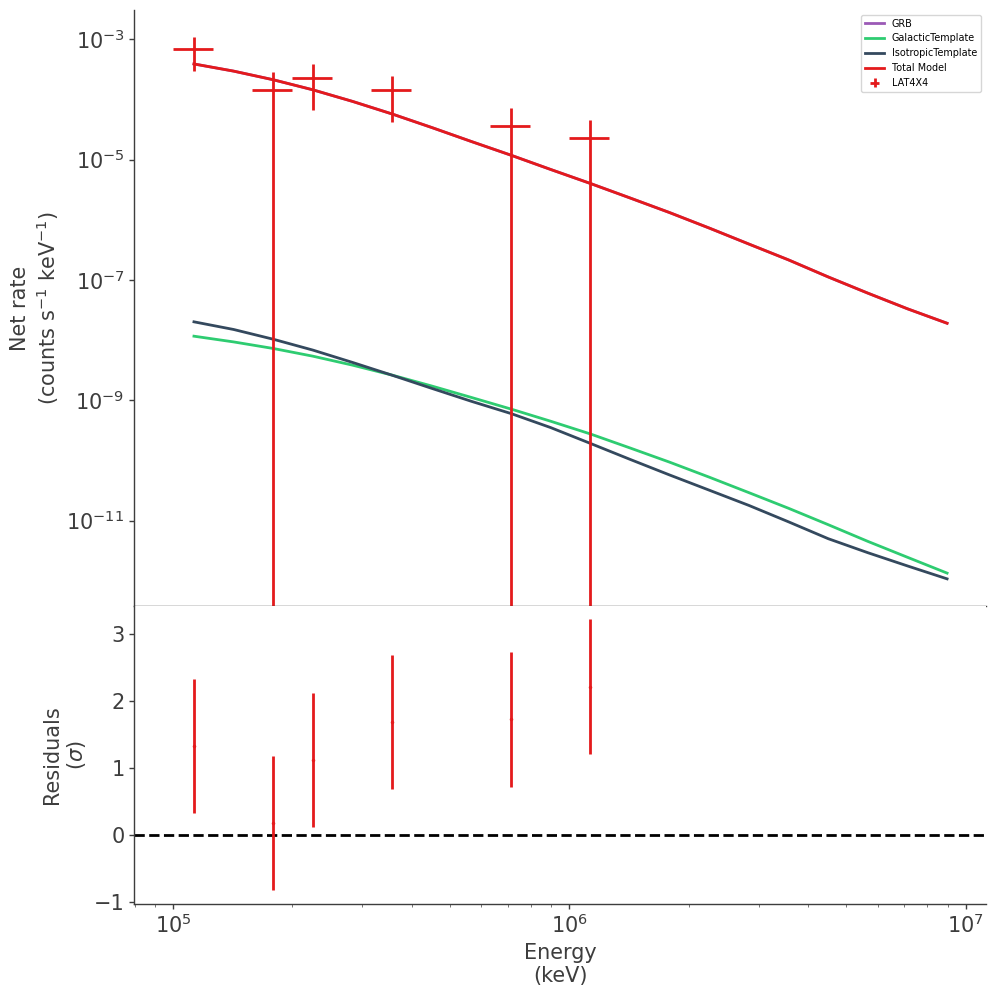

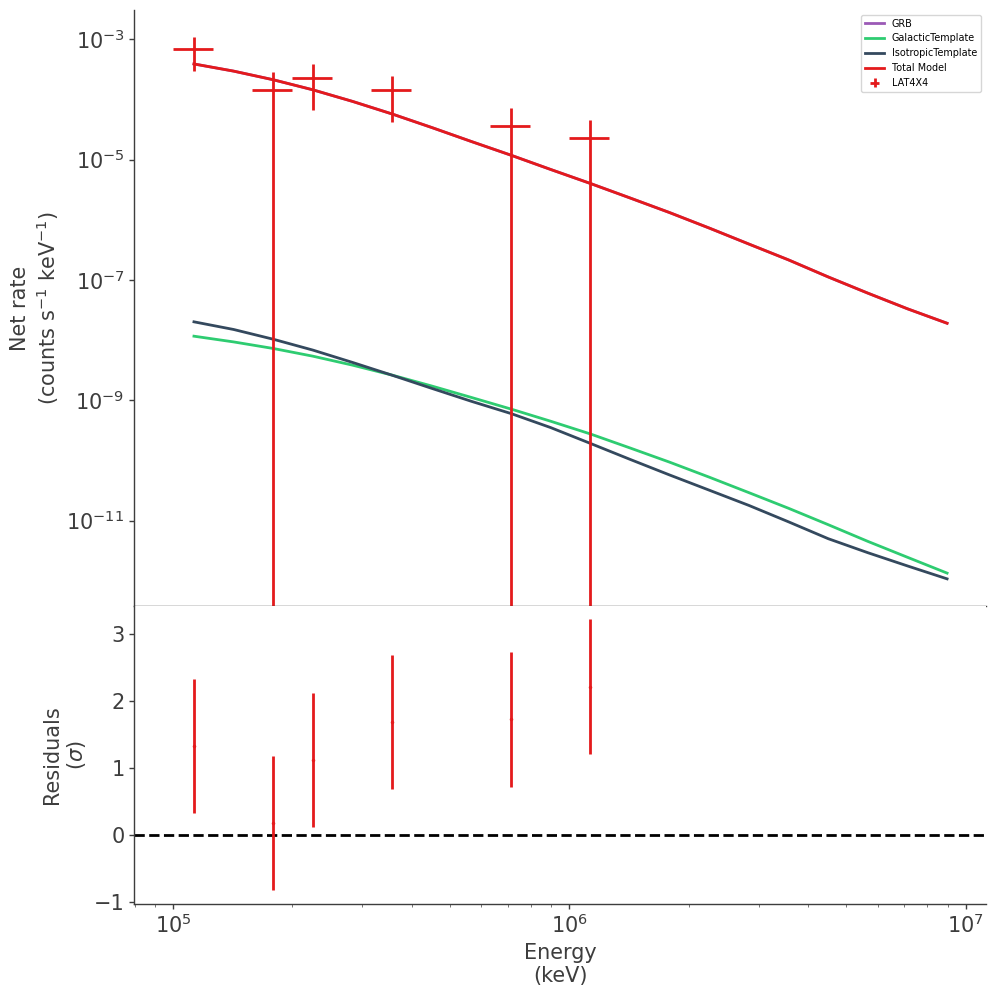

In [16]:
i = 3
T0, T1 = intervals[i], intervals[i + 1]
LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
jl = results[LAT_name]
jl.results.display()
display_spectrum_model_counts(jl, step=False, figsize=(10, 10))

We can see the evolution of the spectrum with time (not all the bins are diplayed):


07:17:22 DEBUG     adding child ra                                                                  ]8;id=340837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=62603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=251079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=216434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=434103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=527543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=745640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=892403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=687949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=909263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=700098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=159485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=86933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=595423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=371790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=358971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=591334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=830095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=488870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=618091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=834614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=159410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=128756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=26296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=934903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=994922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=38868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=18003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=728655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=27490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=70686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=498712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=414663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=563695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=965993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=764255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=300331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=281040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=957066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=570593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=499114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=769698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=143059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=25008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=554959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=231363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=821817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=173402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=48870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=457026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=626777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=111811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=409746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=583141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=171214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=685042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=831429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=874354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=228055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=636720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=620817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=897159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=278136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=276743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=794908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=785860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=768267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=192491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=220992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=611371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=308253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=349317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=29236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=649878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=487014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=776786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=742424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=349002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=770961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=496282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=468534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=113798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=590314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=479700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=974173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=424751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=909568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=596569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=79416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=747608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=377818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=658506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=484064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=684981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=276746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=567939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=141155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=792026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=323372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=110023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=671983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=569680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=283166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=309643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=241205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=704941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=951468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=69559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=60985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=866633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=535549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=555608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=113229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=889024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=824222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=127097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=743005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=828055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=562219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=103237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=170329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=172980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=258259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=608356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=712745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=177411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=235891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=52023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=871384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=550541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=787863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=739764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=506115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=415865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=68472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=435611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=497195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=120991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=520814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=902886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=863366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=375634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=895260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=872524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=121007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=870424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=19034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=989782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=687893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=196286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=58983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=47203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=682780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=798066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=713375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=899976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=561419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=516112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=789431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=169838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=121510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=146874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=330854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=619004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=580200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=463454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=862148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=178432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=511555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=22838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=938692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=354216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=671091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=324088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=715663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=92249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=159627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=360188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=454899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=799530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=339788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=312559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=334463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=494112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=565100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=722400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=903448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=422073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=531836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=785900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=10212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=20340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=541109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=655179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=946559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=242451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=482793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=354478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=924746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=965473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=211965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=993179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

07:17:23 DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=309097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=888261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=927540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=313818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=340504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=479167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=883566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=498203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=747306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=524757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=547433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=812436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=206424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=117831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=812037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=563355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=117838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=707643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=569098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=370973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=347765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=374883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=303485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=984620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=409066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=583409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=771449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=783848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=363348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=743597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=241406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=619569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=262684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=209261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=849522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=464708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=512719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=380824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=356379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=951607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=482540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=944175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=332696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=912470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=684820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=891416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=742764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=486469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=696959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=676663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=958743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=818539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=748486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=367412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=212914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=899568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=776508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=765003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=613803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=44674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=762375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=698332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=648944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=968728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=649452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=700469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=786020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=474458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=278429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=68285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=399714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=711417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=424676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=927301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=513553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=782452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=719739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=334109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=487795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=407849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=179582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=867085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=108468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=155652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=896737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=636966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=984435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=270611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=606130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=787991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=209600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=752092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=774973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=507512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=454732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=803526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=790477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=133719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=151391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=108594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=648779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=549130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=170059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=855201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=160097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=974650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=642711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=896552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=80475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=869302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=482026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=752703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=134418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=521423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=872844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=584212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=744811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=883853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=578126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=753879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=390539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=657247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=901795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=86232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=91098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=567401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=780312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=302190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=3303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=885699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=536928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=166813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=969525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=433154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=986870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=591203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=345241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=316373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=388545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=869732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=772476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=307279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=192213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=608116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=567554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=761523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=83100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=863426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=686366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=113126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=474656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=387036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=953461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=540542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=720795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=711656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=584779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=501589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=245461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=223293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=791554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=974021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=298330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=273523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=319863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=334650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=817421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=338302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=464903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=47;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=168441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=455997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=573485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=774403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=196709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=527293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=100062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=218695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=275953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=139443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=799362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=235662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=569641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=41633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=257556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=136403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=855477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=548142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=43464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=250203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=309360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=400693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=909311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=960160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=360177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=893577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=283562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=683551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=147570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=700098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=320403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=579006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=828373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=727985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=196843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=668263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=283980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=229724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=354934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=572372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=537195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=645658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=290563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=335638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=925921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=70435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=730498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=744752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=447335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=8873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=508859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=791694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=740970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=383240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=151010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=699210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=394012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

processing MLE analyses:   0%|          | 0/13 [00:00<?, ?it/s]

         DEBUG     adding child ra                                                                  ]8;id=166674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=762860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=854423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=623407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=727927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=194188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=282992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=593157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=482477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=997041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=51433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=654475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=404547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=831700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=14687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=2106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=117202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=60307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=340474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=428053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=190685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=689916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=118262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=640093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=184191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=573014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=239061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=702218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=688326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=885255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=853410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:17:33 DEBUG     adding child ra                                                                  ]8;id=998672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=825385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=506013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=438567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=265182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=348732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=4204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=380986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=468044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=658042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=580716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=763937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=788717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=308363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=993720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=959305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=489619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=328645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=836416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=755514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=2696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=155729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=797163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=36345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

07:17:34 DEBUG     path is now: GRB.spectrum                                                       ]8;id=798026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=431178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=169190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=617663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=285447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=144827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=892289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=880845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=601832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:17:44 DEBUG     adding child ra                                                                  ]8;id=296135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=280587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=403973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=857949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=304934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=543972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=225720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=660140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=61071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=709254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=159547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=132765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=919176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=636612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=574229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=427626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=29291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=31200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=840660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=777233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=353140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=835300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=774298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=422514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=634766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=345714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=147890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=743777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=864157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=93724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=671794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=999727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=631500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=327747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:18:05 DEBUG     adding child ra                                                                  ]8;id=818626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=16092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=875953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=720326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=749551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=822674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=591686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=640047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=575268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=698857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=19374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=862227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=97761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=843681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=293470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=458622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=251042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=675476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=208489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=354327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=182584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=556072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=796977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=380170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=836506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=551484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=905387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=418769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=951158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=171253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=834118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=853283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=735832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:18:25 DEBUG     adding child ra                                                                  ]8;id=569044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=575783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=627586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=445279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=109234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=460688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=996937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=574680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=597480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=527366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=875483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=591266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=669611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=394115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=465231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=788988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=640188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=541251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=803271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=868286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=830705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=717477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=230999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=50386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=356635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=293120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=791839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=821539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=590136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=677588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=946088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=961156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=657778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:18:46 DEBUG     adding child ra                                                                  ]8;id=513026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=13311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=740009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=4128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=863968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=538027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=535657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=572594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=410385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=297460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=982241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=713681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=96487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=972057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=871631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=905443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=121325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=390074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=996368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=867851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=664494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=635237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=897318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=157547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=250055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=716359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=94288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=761511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=899505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=471038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=435826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=1092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=508056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=635754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=631173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=1529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=375269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=61970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:19:07 DEBUG     adding child ra                                                                  ]8;id=648557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=643807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=285444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=575983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=528626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=318967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=159784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=401760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=662914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=154786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=917898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=170794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=178424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=460449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=888955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=796492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=395446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=43853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=799705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=539722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=407420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=324043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=755600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=519563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=836359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=785599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=336762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=834714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=315502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=597208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=229959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:19:23 DEBUG     adding child ra                                                                  ]8;id=9771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=579520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=807352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=538899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=892691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=609255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=83271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=120270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=715335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=399364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=58632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=873960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=945225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=182494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=572156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=765049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=159961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=567260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=320884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=599062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=607363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=690303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=663443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=426402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=432762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=563864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=497918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=266897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=874062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=569618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=44147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=251362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=323636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=823019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:19:44 DEBUG     adding child ra                                                                  ]8;id=459711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=84373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=458149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=192791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=963957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=669149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=697590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=141508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=674701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=910613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=692462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=359407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=442173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=762266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=713096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=862471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=214256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=211487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=62810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=354683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=440903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=972426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=67011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=640761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=505237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=799009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=568671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=619730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=295316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=760362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=575856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=630750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=129509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=130708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:20:04 DEBUG     adding child ra                                                                  ]8;id=719892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=913600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=425151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=474578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=364499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=515849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=58838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=886844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=421732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=951144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=225333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=281811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=21448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=423217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=650798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=421341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=357985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=106255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=653810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=997248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=62795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=817770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=322357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=575913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=212765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=698400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=522207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=542583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=283994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=743537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=47026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=817829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=53977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=489692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=522290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:20:26 DEBUG     adding child ra                                                                  ]8;id=370550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=16034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=120117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=389482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=409541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=809520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=414136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=158870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=514018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=46117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=820620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=946824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=347638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=446243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=63795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=34429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=844588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=735641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=435440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=927068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=295495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=728327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=59106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=7669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=476104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=77970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=317414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=636105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=291172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=843136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=643159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=100699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=535995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:20:47 DEBUG     adding child ra                                                                  ]8;id=705424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=567526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=744526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=263969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=997607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=723649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=558777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=377446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=126975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=728386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=181294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=734242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=844922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=121995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=477661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=902574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=908721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=168838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=909155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=771118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=931970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=822761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=223943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=771080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=194462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=765329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=426379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=627710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=915005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=807753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=191335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=819485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:21:07 DEBUG     adding child ra                                                                  ]8;id=826107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=402124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=565901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=774626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=907057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=28606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=997114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=30888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=427007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=818617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=880701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=699883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=945560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=812087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=44384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=886928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=48780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=186355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=274744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=620920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=664678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=123416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=355167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=218644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=698329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=615688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=123830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=507947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=87928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=779364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=153370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=379921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=548315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=317091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=436787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

07:21:28 DEBUG     converting MeV to MeV                                                          ]8;id=231867;file:///Users/runner/work/threeML/threeML/threeML/io/plotting/model_plot.py\model_plot.py]8;;\:]8;id=789713;file:///Users/runner/work/threeML/threeML/threeML/io/plotting/model_plot.py#890\890]8;;\

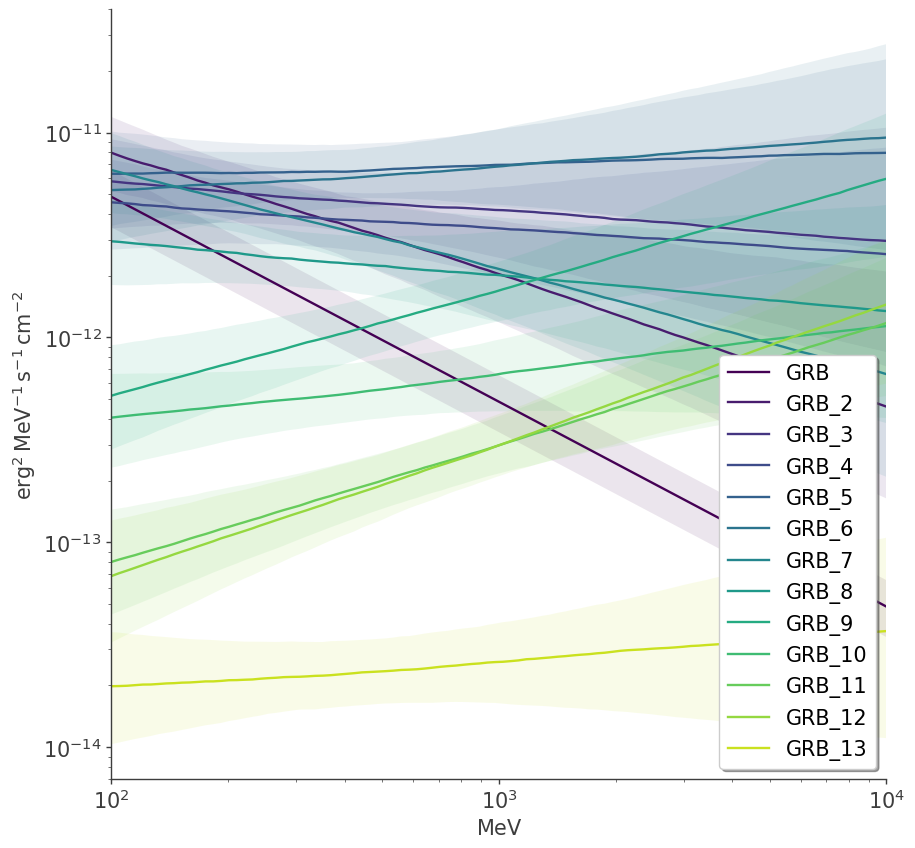

In [17]:
fig = plot_spectra(
    *[results[k].results for k in list(results.keys())[::2]],
    ene_min=100 * u.MeV,
    ene_max=10 * u.GeV,
    flux_unit="erg2/(cm2 s MeV)",
    energy_unit="MeV",
    fit_cmap="viridis",
    contour_cmap="viridis",
    contour_style_kwargs=dict(alpha=0.1)
)
fig.set_size_inches(10, 10)

Finally, we can display flux lightcurves and index evolution with time.


07:21:29 DEBUG     adding child ra                                                                  ]8;id=453101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=786525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=757040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=395996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=229634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=416128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=871315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=848783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=957148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=806363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=189969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=750578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=805773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=44866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=740324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=77931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=96169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=83548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=311141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=894997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=613639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=107514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=247636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=216150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=21053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=93882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=817360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=525240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=804647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=965474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=935627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=912410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=940761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=563471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=339154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=258307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=882483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=900037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=424380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=930801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=919169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=213613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=728628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=999898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=889550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=55341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=650772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=21623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=346741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=267576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=666083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=381875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=196347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=298156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=106116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=525284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=733928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=400225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=715825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=460186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=961443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=831562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=637267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

07:21:30 DEBUG     path is now: GRB                                                                ]8;id=652101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=710386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=27494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=114684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=293193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=409650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=946650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=847410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=61250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=270956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=578177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=121273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=775824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=106648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=149594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=495750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=294205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=355649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=88480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=393516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=181846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=443398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=321023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=285973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=399388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=63920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=4261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=113736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=923132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=601820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=903421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=736516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=985952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=208085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=915234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=444017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=71644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=931076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=294956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=14815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=689335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=42767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=66999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=49562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=807584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=533049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=930168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=296901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=383423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=602534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=336705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=15217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=259420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=664686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=750017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=774835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=72992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=199525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=128183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=48457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=843868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=684497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=284389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=232187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=283903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=276866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=532527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=698191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=183811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=286300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=622988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=219500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=118799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=381341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=238552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=649175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=764197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=569341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=628252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=371292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=385679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=645330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=636655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=511475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=647864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=414134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=285171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=150095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=309388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=42517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=637373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=615295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=182750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=375558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=746995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=728954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=37959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=892437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=842596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=296981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=711366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=568957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=815720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=594277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=423441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=482834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=178083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=328227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=276368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=531197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=807450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=979921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=583860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=256231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=91589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=85425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=468874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=732335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=468313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=955039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=812809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=249663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=679980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=849319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=696834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=534009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=730174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=409761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=513883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=269902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=274979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=215695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=646544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=237200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=289111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=175681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=148171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=661145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=524992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=27335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=388267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=366810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=298720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=812315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=426830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=103891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=735100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=64060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=372982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=315418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=270641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=802649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=903502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=760936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=211859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=426496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=975800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=186263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=873970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=820711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=739144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=57237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=604000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=826120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=500434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=991519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=926027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=875415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=315638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=699537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=172466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=132512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=875653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=312285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=45782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=872185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=147871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=355505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=385925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=524325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=313583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=791711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=567814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=431883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=631727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=658202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=324665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=837039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=42359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=424305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=985115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=383389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=131303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=884405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=907486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=446215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=42490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=104325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=192382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=252602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=618501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=801087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=664597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=566781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=449736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=377186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=62335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=65783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=951712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=298763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=121885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=650027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=154739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=876110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=643881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=70570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=346113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=948788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=941488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=261639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=873107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=194920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=10221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=926381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=800982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=580090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=364832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=790342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=608304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=887544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=991487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=974196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=984345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=465518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=797503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=59948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=259552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=29314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=465129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=67435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=829412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=458528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=33370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=518176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=861655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=844267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=344596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=61018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=50241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=231303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=821348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=849517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=34021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=111623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=451732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=821614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=54119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=129090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=964724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=639134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=361476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=733991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=953559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=584066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=505228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=594990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=731664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=589663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=36630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=161936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=384975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=497155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=624766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=46891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=399746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=15464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=807827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=192888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=835606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=64420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=294950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=22311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=182917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=485460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=321424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=925940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=760924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=988606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=869831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=211621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=731409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=860091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=438398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=561025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=223961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=220762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=267034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=147677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=516275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=809078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=246122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=202198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=10144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=891171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=77992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=819028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=36686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=212848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=935491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=116965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=54503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=934808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=740447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=154241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=67224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=804915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=745896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=296745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=687593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=656344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=84954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=178524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=358739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=27758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=814951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=819807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=847028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=819159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=564185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=500276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=427593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=977626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=383179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=61132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=535378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=927517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=642049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=653977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=442336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=417862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=561203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

07:21:31 DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=757093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=132400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=397937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=653685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=269695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=52846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=115591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=261418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=623588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=889159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=989509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=795878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=736307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=821031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=385628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=274802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=679954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=846678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=545970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=126496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=855348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=434691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=815970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=348288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=853449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=817004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=773420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=117521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=982792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=549072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=386153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=321122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=337073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=266833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=507593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=63794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=437711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=289819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=142837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=961368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=151329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=398474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=345540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=454031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=71144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=598397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=182854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=152432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=456389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=913406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=608327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=531560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=111835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=924165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=884100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=705906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=801654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=801021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=921849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=220623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=736780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=718232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=215895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=208010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=114969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=59052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=849249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=115737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=309792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=282342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=606558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=659364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=351941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=955212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=483004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=276100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=690871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=763116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=867825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=903532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=177367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=612008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=596920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=310684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=421405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=933866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=979437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=63540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=434372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=107907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=892920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=978373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=26041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=726892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=910357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=604562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=448853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=821257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=936674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=451950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=128620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=463854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=669410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=246794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=570063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=739662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=6714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=955107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=338272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=480216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=999400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=214105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=175900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=160261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=886174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=649178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=133115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=519232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=192600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=392433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=787232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=176709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=916471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=356168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=938659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=177080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=504886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=40028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=732985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=247994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=419960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=629793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=676154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=388634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=364492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=601395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=700393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=346678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=526103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=842709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=357281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=516158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=282371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=315106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=537116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=692600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=392500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=140777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=276135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=984705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=101596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=112819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=795326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=317145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=389715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=154435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=599886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=735170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=415714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=521354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=748190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=60743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=290769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=270652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=457749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=376596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=163994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=196526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=664283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=523727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=634182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=154323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=333090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=14540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=447982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=695618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=523140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=15352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=41089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=864723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=617990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=25675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=104202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=364978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=16353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=676181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=896131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=608750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=693584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=665571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=998407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=75733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=885070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=357086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=883850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=945544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=464423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=679293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=647992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=751531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=224981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=889652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=757708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=474872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=31979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=155727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=434484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=902930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=825065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=988568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=762159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=26843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=715240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=708608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=14649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=341615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=206697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=909741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=205876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=278213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=691163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=989864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=317358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=832939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=905116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=416132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=202170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=111906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=680478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=558253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=272073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=868397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=460093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=208847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=22647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=407636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=335090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=724108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=555326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=909457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=30025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=565900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=867989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=179331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=314913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=200417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=702292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=941998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=128551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=82703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=120653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=115384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=555304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=184497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=576081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=176040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=802258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=514528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=819892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=495093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=211792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=529891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=170644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=349829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=576054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=405137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=272280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=49164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=368237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=208314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=771203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=147601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=723574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=132468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=835746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=465732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=346397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=154563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=910207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=115295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=49016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=938420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=726168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=676584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=367134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=674209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=888001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=248360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=960943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=919378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=39488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=641630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=584898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=244278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=129927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=900657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=770461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=170237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=437593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=319615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=666517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=965801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=172242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=38326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=565675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=289938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=968004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=884294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=994649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=567048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=478489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=735133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=242059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=724832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=172610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=901308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=522612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=425162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=428105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=96570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=518421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=899078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=228363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=191423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=35168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=345975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=727610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=727175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=710183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=847171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=860626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=115586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=393645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=41586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

07:21:32 DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=363104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=134558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=176978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=724659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=888313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=544391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=276656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=156592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=915062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=58022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=51663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=400291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=994887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=63543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=527412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=138742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=596967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=903005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=699655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=674157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=252110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=291817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=743731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=382700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=605865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=346361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=337877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=951888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=950610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=576187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=856097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=493700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=53611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=982365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=784165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=426504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=862478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=924692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=952003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=803312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=251595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=684482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=316510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=612241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=436863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=295619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=484713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=5446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=559918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=527736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=672125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=607737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=444721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=851516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=817025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=742588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=23683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=549032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=550943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=679950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=712427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=192920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=72581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=322005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=270417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=659761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=728643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=470414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=106829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

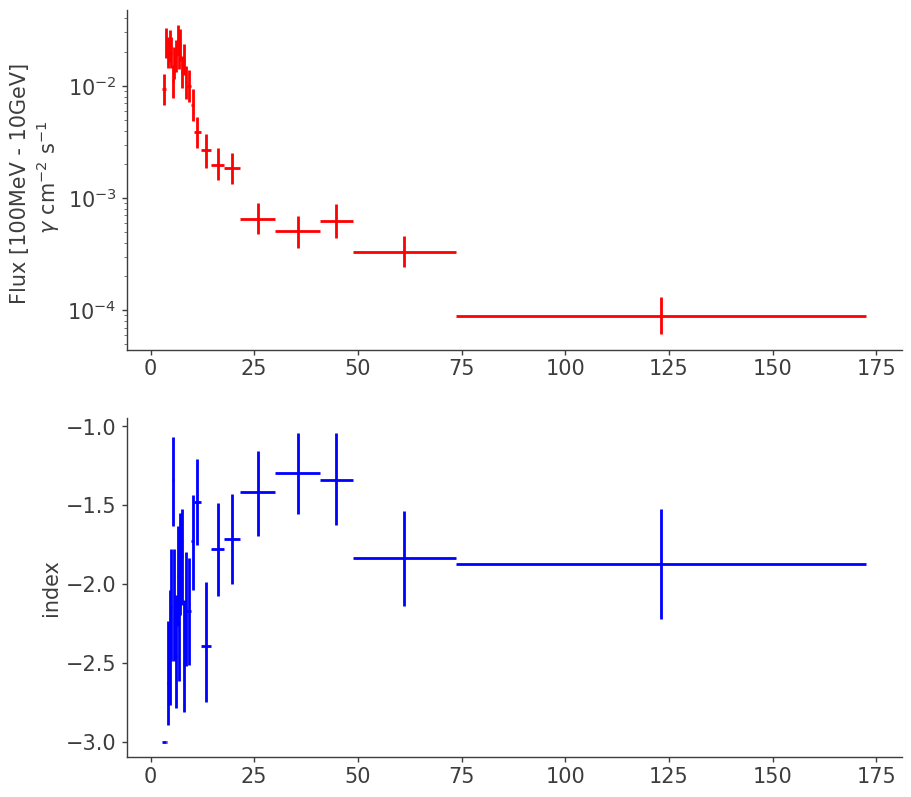

In [18]:
variates = ["F", "index"]
y = {}
for n in variates:
    y[n] = []
    y[n + "_p"] = []
    y[n + "_n"] = []
x = []
dx = []


for T0, T1 in zip(intervals[:-1], intervals[1:]):
    LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
    x.append((T1 + T0) / 2)
    dx.append((T1 - T0) / 2)
    jl = results[LAT_name]
    res = jl.results
    mod = res.optimized_model
    ps = mod.point_sources

    for n in variates:
        my_variate = res.get_variates("GRB.spectrum.main.Powerlaw_flux.%s" % n)
        y[n].append(my_variate.median)
        y[n + "_p"].append(my_variate.equal_tail_interval()[1] - my_variate.median)
        y[n + "_n"].append(my_variate.median - my_variate.equal_tail_interval()[0])
        pass
    pass

fig = plt.figure(figsize=(10, 15))
colors = ["r", "b"]
ylabels = ["Flux [100MeV - 10GeV] \n $\gamma$ cm$^{-2}$ s$^{-1}$", "index"]
for i, n in enumerate(variates):
    plt.subplot(len(variates) + 1, 1, i + 1)
    plt.errorbar(x, y[n], xerr=dx, yerr=(y[n + "_n"], y[n + "_p"]), ls="", c=colors[i])
    if i == 0:
        plt.yscale("log")
    # plt.xscale('log')
    plt.ylabel(ylabels[i])
    pass